In [ ]:
import numpy as np
from packaging import version
import subprocess
import sys
# Following code required owing to the issue here https://github.com/h2oai/h2o-3/issues/16462 , once numpy 2 is supported the code can be removed
# Check if current NumPy is >= 2
if version.parse(np.__version__) >= version.parse("2.0"):
    print(f"Detected NumPy {np.__version__}, reinstalling < 2.0...")
    !pip install --force-reinstall --no-cache-dir "numpy<2"
    # Restart runtime manually
else:
    print(f"NumPy {np.__version__} is already < 2.0. No action needed.")


NumPy 1.26.4 is already < 2.0. No action needed.


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install h2o
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 4.4 MB/s eta 0:00:00


In [ ]:
import re

In [ ]:
import matplotlib.pyplot as plt
def save_classification_metrics_and_plots(model, data, save_path):
    """
    Save important classification metrics and plots to a file.

    Args:
        model (H2OModel): The classification model.
        data (H2OFrame): The dataset for evaluation.
        save_path (str): The directory path where metrics and plots will be saved.

    Returns:
        None
    """
    # Create a directory to save the files
    os.makedirs(save_path, exist_ok=True)

    # Compute confusion matrix using the perf object
    perf = model.model_performance(data)
    confusion = perf.confusion_matrix()

    with open(os.path.join(save_path, 'confusion_matrix.txt'), 'w') as confusion_file:
      confusion_file.write(str(confusion))

    # Save the confusion matrix as a CSV file
    #confusion.to_csv(os.path.join(save_path, 'confusion_matrix.csv'))

    # Save classification metrics to a text file
    with open(os.path.join(save_path, 'classification_metrics.txt'), 'w') as metrics_file:
        metrics_file.write(f"Accuracy: {perf.accuracy()}\n")
        metrics_file.write(f"Precision: {perf.precision()}\n")
        metrics_file.write(f"Recall: {perf.recall()}\n")
        metrics_file.write(f"F1 Score: {perf.F1()}\n")

    roc_curve_file = f"{save_path}/roc_curve.png"

    # Use the plot function with save_to_file parameter to save the plots to files
    perf.plot(type="roc", save_to_file=roc_curve_file)

    # Save AUC to a text file
    auc = perf.auc()
    with open(os.path.join(save_path, 'auc.txt'), 'w') as auc_file:
        auc_file.write(f"AUC: {auc}\n")



In [ ]:
import h2o
import pandas as pd
# helper function to format grid search results

In [ ]:
def performance_table_class(models, train_data, valid_data):
    model_perf = []
    for model in models:
        model_id = model.model_id
        train_logloss = model.logloss(train = True)
        cv_logloss = model.logloss(xval = True)
        valid_logloss = model.logloss(valid = True)

        # Compute classification metrics for the validation data
        valid_performance = model.model_performance(valid_data)
        accuracy = valid_performance.accuracy()[0][1]
        f1_scores = valid_performance.F1()
        #weighted_f1 = sum([f1[1] * valid_data['pendency_model_multiyear'].table()['N'][i] for i, f1 in enumerate(f1_scores)])
        auc = valid_performance.auc()


        model_perf.append([model_id, train_logloss, cv_logloss, valid_logloss, accuracy, f1_scores , auc])


    model_perf_df = pd.DataFrame(model_perf, columns=["model", "train_logloss", "cv_logloss", "valid_logloss", "accuracy", "f1", "auc"])
    model_perf_df = model_perf_df.sort_values(by="valid_logloss")

    return model_perf_df



In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
h2o.init(max_mem_size = "45g")


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.28" 2025-07-15; OpenJDK Runtime Environment (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp040anyxc
  JVM stdout: /tmp/tmp040anyxc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp040anyxc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 months and 12 days
H2O_cluster_name:,H2O_from_python_unknownUser_afue4a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,45 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [ ]:
cases2010to2018_h2o = h2o.import_file('/content/drive/MyDrive/Law/Model1cData_2010to2018_merged_criminal.csv')
#cases2010to2018_h2o = h2o.import_file('/content/drive/MyDrive/Law/automl_2010to2018_merged_all.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
cases2010to2018_h2o.types

{'state_code': 'int',
 'female_defendant': 'int',
 'female_petitioner': 'enum',
 'female_adv_def': 'int',
 'female_adv_pet': 'int',
 'billable_ipc': 'enum',
 'female_judge_filing': 'enum',
 'female_judge_decision': 'enum',
 'judgediff': 'int',
 'pendency_first_filing': 'int',
 'muslim_defendant': 'enum',
 'muslim_petitioner': 'enum',
 'muslim_adv_def': 'int',
 'muslim_adv_pet': 'int',
 'court_details': 'enum',
 'state_district': 'enum',
 'pendency_model_multiyear': 'enum',
 'filing_judge_tenure_at_filing': 'int',
 'decision_judge_tenure_at_decision': 'int',
 'act_s': 'enum',
 'section_s': 'int',
 'type_name_s': 'enum',
 'judge_position_s': 'enum',
 'number_sections_ipc_category': 'enum'}

In [ ]:
#Remove all columns not available at time of case filing

# List of columns to keep
columns_to_keep = cases2010to2018_h2o.columns

columns_to_keep.remove("female_judge_decision")
columns_to_keep.remove("decision_judge_tenure_at_decision")
columns_to_keep.remove("pendency_first_filing")
columns_to_keep.remove("judgediff")
#Drop columns related to advocate and religion
columns_to_keep.remove("muslim_defendant")
columns_to_keep.remove("muslim_petitioner")
columns_to_keep.remove("muslim_adv_def")
columns_to_keep.remove("muslim_adv_pet")
columns_to_keep.remove("female_adv_def")
columns_to_keep.remove("female_adv_pet")
columns_to_keep.remove("female_defendant")
columns_to_keep.remove("female_petitioner")
columns_to_keep.remove("female_judge_filing")


# Use the assign method to drop columns
cases2010to2018_h2o = cases2010to2018_h2o[columns_to_keep]


In [ ]:
cases2010to2018_h2o.types

{'state_code': 'int',
 'billable_ipc': 'enum',
 'court_details': 'enum',
 'state_district': 'enum',
 'pendency_model_multiyear': 'enum',
 'filing_judge_tenure_at_filing': 'int',
 'act_s': 'enum',
 'section_s': 'int',
 'type_name_s': 'enum',
 'judge_position_s': 'enum',
 'number_sections_ipc_category': 'enum'}

In [ ]:
cases2010to2018_h2o

state_code,billable_ipc,court_details,state_district,pendency_model_multiyear,filing_judge_tenure_at_filing,act_s,section_s,type_name_s,judge_position_s,number_sections_ipc_category
1,bailable,1_1_1,1_1,ontime,4,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one
1,NA,1_2_1,1_2,delayed,66,Code of Criminal Procedure,397,cri.rev.app.,District And Sessions Court,NA
1,NA,1_2_2,1_2,ontime,1,Code of Criminal Procedure,457,NA,Chief Judicial Magistrate,NA
1,non-bailable,1_2_7,1_2,delayed,1,The Indian Penal Code,452,NA,Civil Judge Junior Division,5 to 10
1,NA,1_3_11,1_3,ontime,3,Code of Criminal Procedure,125,NA,Criminal Cases Others,NA
1,NA,1_3_19,1_3,delayed,22,The Indian Penal Code,nan,r.c.c.,Criminal Cases Others,one
1,non-bailable,1_4_13,1_4,ontime,29,The Indian Penal Code,420,NA,civil judge,one
1,NA,1_5_2,1_5,ontime,0,The Indian Penal Code,nan,NA,Chief Judicial Magistrate,one
1,NA,1_7_1,1_7,ontime,12,Code of Criminal Procedure,438,NA,District And Sessions Court,NA
1,bailable,1_7_2,1_7,ontime,2,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one


In [ ]:
#TBD to be converted to embeddings
cases2010to2018_h2o['section_s'] = cases2010to2018_h2o['section_s'].asfactor()
#cases2010to2018_h2o['section_s'] = cases2010to2018_h2o['section_s'].ascharacter()

In [ ]:
# Change types
cases2010to2018_h2o['state_code'] = cases2010to2018_h2o['state_code'].asfactor()


In [ ]:
cases2010to2018_h2o.types

{'state_code': 'enum',
 'billable_ipc': 'enum',
 'court_details': 'enum',
 'state_district': 'enum',
 'pendency_model_multiyear': 'enum',
 'filing_judge_tenure_at_filing': 'int',
 'act_s': 'enum',
 'section_s': 'enum',
 'type_name_s': 'enum',
 'judge_position_s': 'enum',
 'number_sections_ipc_category': 'enum'}

In [ ]:
cases2010to2018_h2o.head()

state_code,billable_ipc,court_details,state_district,pendency_model_multiyear,filing_judge_tenure_at_filing,act_s,section_s,type_name_s,judge_position_s,number_sections_ipc_category
1,bailable,1_1_1,1_1,ontime,4,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one
1,NA,1_2_1,1_2,delayed,66,Code of Criminal Procedure,397,cri.rev.app.,District And Sessions Court,NA
1,NA,1_2_2,1_2,ontime,1,Code of Criminal Procedure,457,NA,Chief Judicial Magistrate,NA
1,non-bailable,1_2_7,1_2,delayed,1,The Indian Penal Code,452,NA,Civil Judge Junior Division,5 to 10
1,NA,1_3_11,1_3,ontime,3,Code of Criminal Procedure,125,NA,Criminal Cases Others,NA
1,NA,1_3_19,1_3,delayed,22,The Indian Penal Code,,r.c.c.,Criminal Cases Others,one
1,non-bailable,1_4_13,1_4,ontime,29,The Indian Penal Code,420,NA,civil judge,one
1,NA,1_5_2,1_5,ontime,0,The Indian Penal Code,,NA,Chief Judicial Magistrate,one
1,NA,1_7_1,1_7,ontime,12,Code of Criminal Procedure,438,NA,District And Sessions Court,NA
1,bailable,1_7_2,1_7,ontime,2,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one


In [ ]:
print(len(cases2010to2018_h2o))

22389955


In [ ]:
#change name of billable to bailable_IPC
new_column_name = "bailable_ipc"
old_column_name = "billable_ipc"

# Get the current column names as a list
column_names = cases2010to2018_h2o.columns

# Find the index of the column you want to rename
column_index = column_names.index(old_column_name)

# Replace the old column name with the new one
column_names[column_index] = new_column_name

# Set the new column names for the DataFrame
cases2010to2018_h2o.set_names(column_names)

state_code,bailable_ipc,court_details,state_district,pendency_model_multiyear,filing_judge_tenure_at_filing,act_s,section_s,type_name_s,judge_position_s,number_sections_ipc_category
1,bailable,1_1_1,1_1,ontime,4,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one
1,NA,1_2_1,1_2,delayed,66,Code of Criminal Procedure,397,cri.rev.app.,District And Sessions Court,NA
1,NA,1_2_2,1_2,ontime,1,Code of Criminal Procedure,457,NA,Chief Judicial Magistrate,NA
1,non-bailable,1_2_7,1_2,delayed,1,The Indian Penal Code,452,NA,Civil Judge Junior Division,5 to 10
1,NA,1_3_11,1_3,ontime,3,Code of Criminal Procedure,125,NA,Criminal Cases Others,NA
1,NA,1_3_19,1_3,delayed,22,The Indian Penal Code,,r.c.c.,Criminal Cases Others,one
1,non-bailable,1_4_13,1_4,ontime,29,The Indian Penal Code,420,NA,civil judge,one
1,NA,1_5_2,1_5,ontime,0,The Indian Penal Code,,NA,Chief Judicial Magistrate,one
1,NA,1_7_1,1_7,ontime,12,Code of Criminal Procedure,438,NA,District And Sessions Court,NA
1,bailable,1_7_2,1_7,ontime,2,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one


In [ ]:
from h2o.estimators import H2ORandomForestEstimator
import copy

In [ ]:
cases2010to2018_train, cases2010to2018_test, cases2010to2018_valid = cases2010to2018_h2o.split_frame(ratios=[.7, .15])

In [ ]:
y = "pendency_model_multiyear"
x = cases2010to2018_h2o.columns
x.remove(y)


In [ ]:
nfolds = 3
seed = 1234
search_criteria = {'seed': seed,'strategy': "RandomDiscrete", 'max_models': 2}

In [ ]:
default_drf_params = {
    'ntrees':50,
    'max_depth': 20,
    'min_rows': 1,
    'score_tree_interval': 5,
    'stopping_rounds': 3, # early stopping
    'col_sample_rate_per_tree': 1,
    'min_split_improvement' : 1e-05,
    'sample_rate':0.632,
    'stopping_metric':'logloss'
}

In [ ]:
best_guess_drfs = []
model_params = copy.deepcopy(default_drf_params)
drf = H2ORandomForestEstimator(nfolds=nfolds, seed=seed,**model_params)
drf.train(training_frame=cases2010to2018_train, validation_frame=cases2010to2018_valid, y=y, x=x)
best_guess_drfs = best_guess_drfs + [drf]

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [ ]:
from h2o.grid import H2OGridSearch

In [ ]:
drf_search_params = { 'ntrees': [50, 70],
                      'max_depth': [20, 30],
                      'sample_rate':[0.8]
                    }

In [ ]:
# remove parameters that are being searched from the default dictionary
for k in drf_search_params.keys():
    default_drf_params.pop(k, None)

In [31]:
drf_grid = H2OGridSearch(model=H2ORandomForestEstimator,
                         grid_id='drf_grid',
                         search_criteria=search_criteria,
                         hyper_params=drf_search_params)
drf_grid.train(x=x, y=y,
               training_frame=cases2010to2018_train,
               validation_frame=cases2010to2018_valid,
               nfolds=nfolds,
               seed=seed,
               **default_drf_params)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,ntrees,sample_rate,model_ids,logloss
,30.0,43.0,0.8,drf_grid_model_1,0.4124475
,20.0,45.0,0.8,drf_grid_model_2,0.4186478


In [32]:
all_drf_models = best_guess_drfs + [h2o.get_model(id) for id in drf_grid.get_grid().model_ids]



In [33]:
output_directory = "/content/drive/MyDrive/Law/criminalall-used/performance"
os.makedirs(output_directory, exist_ok=True)

save_path = "/content/drive/MyDrive/Law/criminalall-used/saved_models/"
os.makedirs(save_path, exist_ok=True)

In [34]:
drf_perf = performance_table_class(all_drf_models,cases2010to2018_train,cases2010to2018_valid)
drf_perf.to_csv('/content/drive/MyDrive/Law/criminalall-used/model_performance.csv', index=False)

In [43]:
drf_perf

,model,train_logloss,cv_logloss,valid_logloss,accuracy,f1,auc
1,drf_grid_model_1,0.435595,0.412448,0.409977,0.803587,"[[0.4174284382635171, 0.8401053204882523]]",0.888996
0,DRF_model_python_1754752471123_1,0.417913,0.419507,0.416268,0.798476,"[[0.42591603523695, 0.8359210581761073]]",0.885272
2,drf_grid_model_2,0.422314,0.418648,0.418710,0.798615,"[[0.4250255324203167, 0.8358324868649416]]",0.885062


In [ ]:
best_model = h2o.get_model(drf_perf.iloc[0, 0])

In [42]:
best_model.params.keys()

print(best_model.params.keys())

# Inspect individual parameter values
print(best_model.params['ntrees'])
print(best_model.params['max_depth'])
print(best_model.params['min_rows'])
print(best_model.params['score_tree_interval'])
print(best_model.params['stopping_rounds'])
print(best_model.params['col_sample_rate_per_tree'])
print(best_model.params['min_split_improvement'])
print(best_model.params['sample_rate'])
print(best_model.params['stopping_metric'])
print(best_model.params['stopping_tolerance'])

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'score_tree_interval', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'balance_classes', 'class_sampling_factors', 'max_after_balance_size', 'max_confusion_matrix_size', 'ntrees', 'max_depth', 'min_rows', 'nbins', 'nbins_top_level', 'nbins_cats', 'r2_stopping', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'build_tree_one_node', 'mtries', 'sample_rate', 'sample_rate_per_class', 'binomial_double_trees', 'checkpoint', 'col_sample_rate_change_per_level', 'col_sample_rate_per_tree', 'min_split_improvement', 'histogram_type', 'categorical_encoding', 'calibrate_model', 'calibration_frame', 'calibration_method', 'distribution', 'custom_metric_func', 'export_checkpoints_d

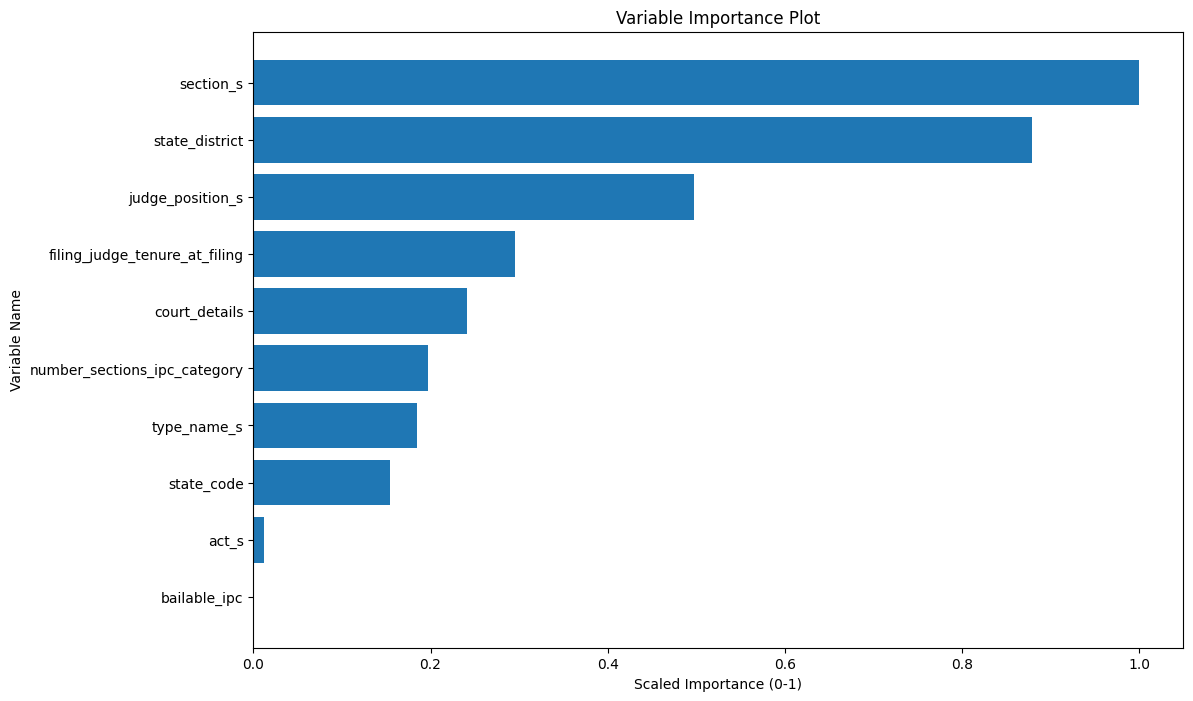

In [38]:
# Get variable importance scores for all variables
varimp = best_model.varimp(use_pandas=True)
from sklearn.preprocessing import MinMaxScaler

# Sort the DataFrame by relative variable importance in descending order
varimp = varimp.sort_values(by='relative_importance', ascending=True)

# Min-Max scaling
scaler = MinMaxScaler()
varimp['scaled_importance'] = scaler.fit_transform(varimp[['relative_importance']])

# Create a bar plot for all variables and their importance scores
plt.figure(figsize=(12, 8))
plt.barh(varimp['variable'], varimp['scaled_importance'])
plt.xlabel('Scaled Importance (0-1)')
plt.ylabel('Variable Name')
plt.title('Variable Importance Plot')

# Save the plot to a file
plt.savefig('/content/drive/MyDrive/Law/criminalall-used/variable_importance_plot.png')

plt.show()


/tmp/ipython-input-1985844485.py:37: H2ODeprecationWarning: ``save_to_file`` param of ``H2OBinomialModelMetrics.plot`` is deprecated, please use ``save_plot_path`` instead.
  perf.plot(type="roc", save_to_file=roc_curve_file)


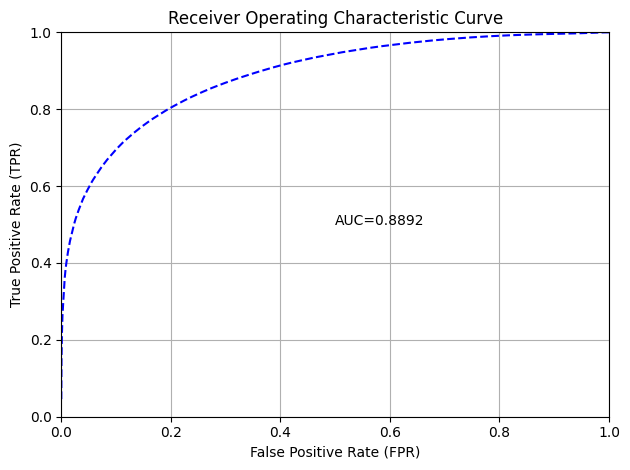

'/content/drive/MyDrive/Law/criminalall-used/saved_models/drf_grid_model_1.zip'

In [39]:

# Call the function to save metrics and plots for the current model
save_classification_metrics_and_plots(best_model,cases2010to2018_test, output_directory)
best_model.save_mojo(path=save_path)


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## drf_grid_model_1

,delayed,ontime,Error,Rate
delayed,913556.0,427361.0,0.3187,(427361.0/1340917.0)
ontime,245254.0,1772444.0,0.1216,(245254.0/2017698.0)
Total,1158810.0,2199805.0,0.2003,(672615.0/3358615.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

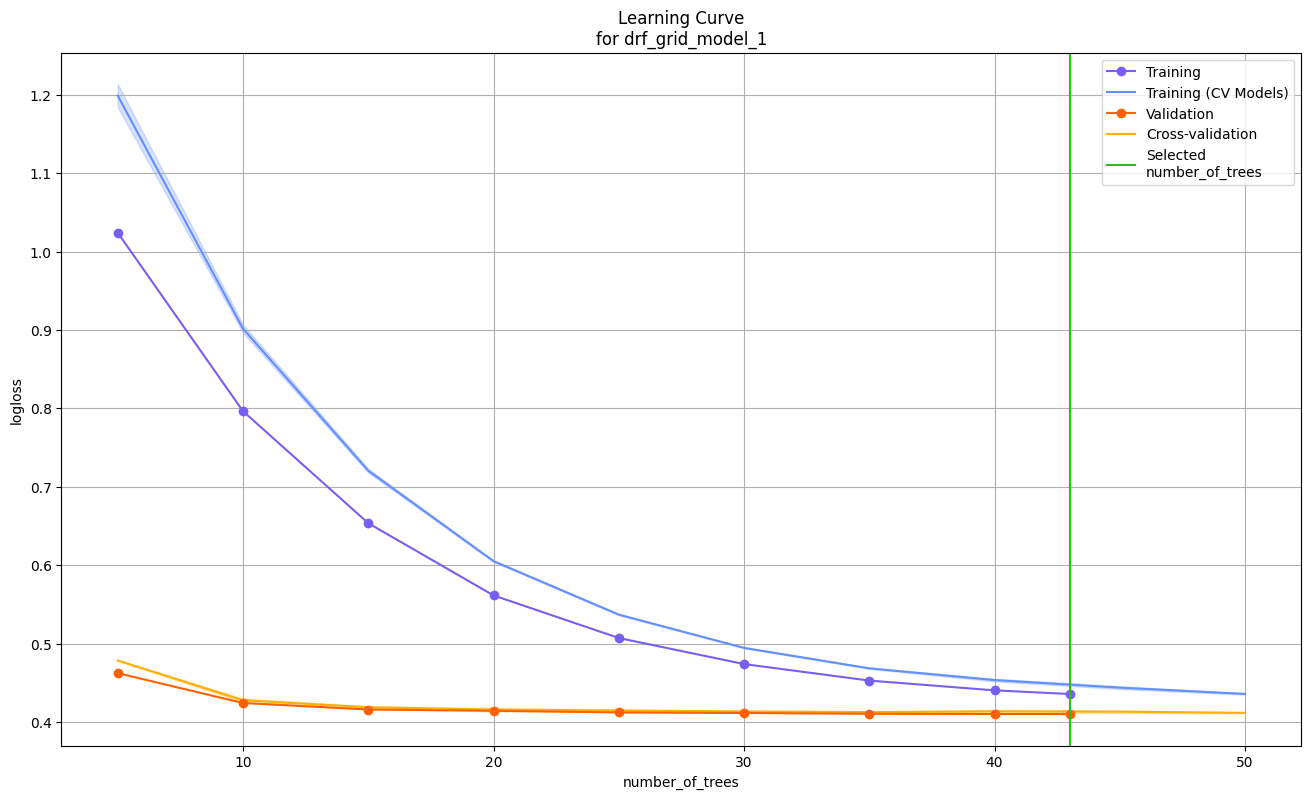

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

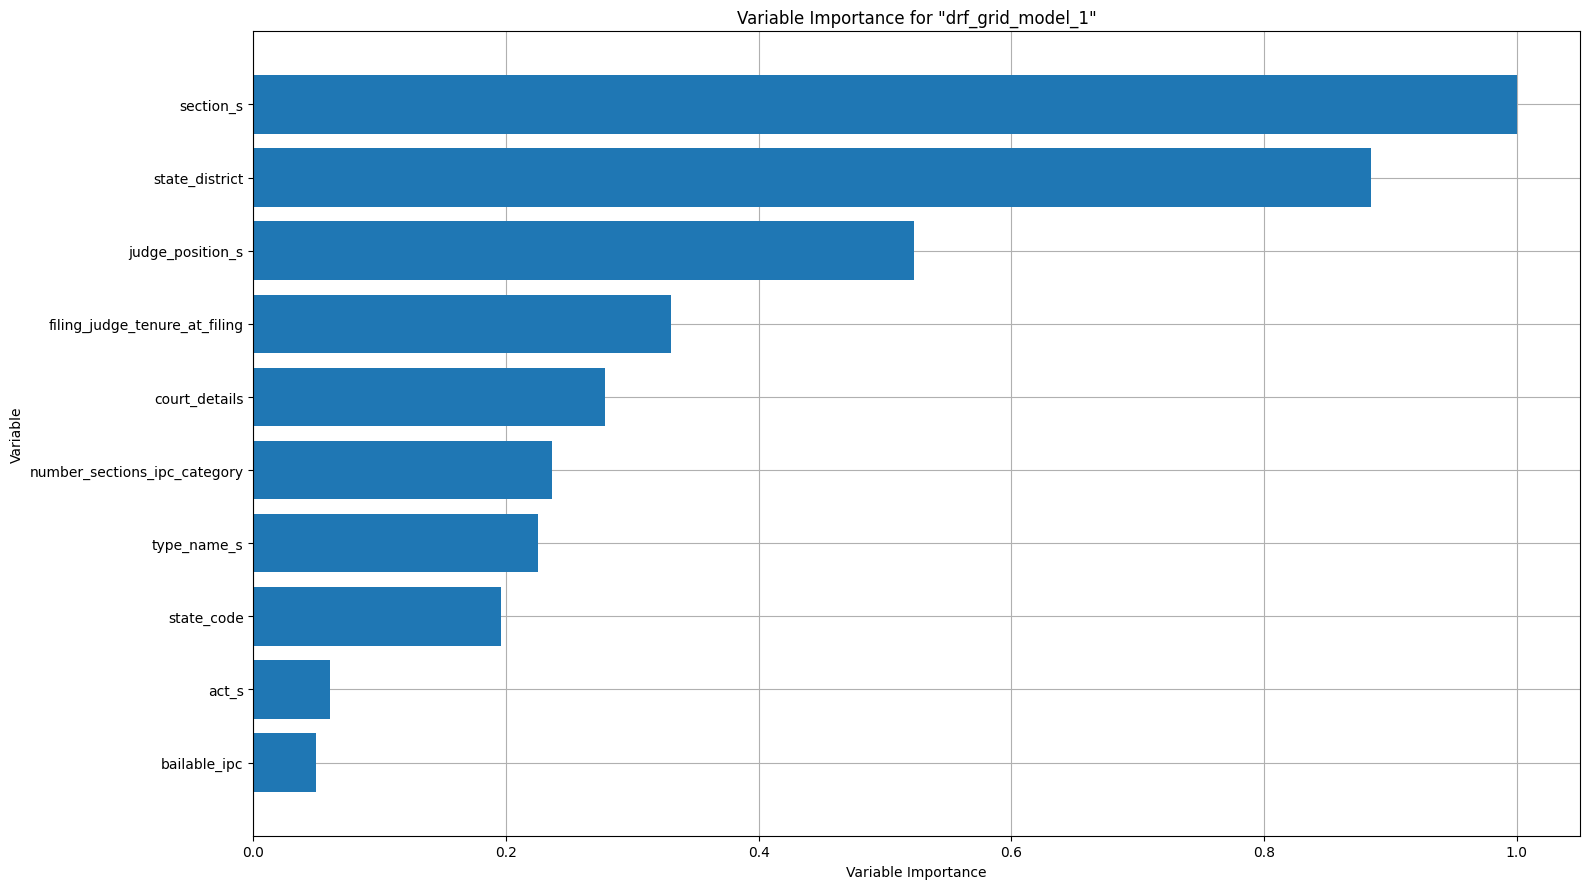

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

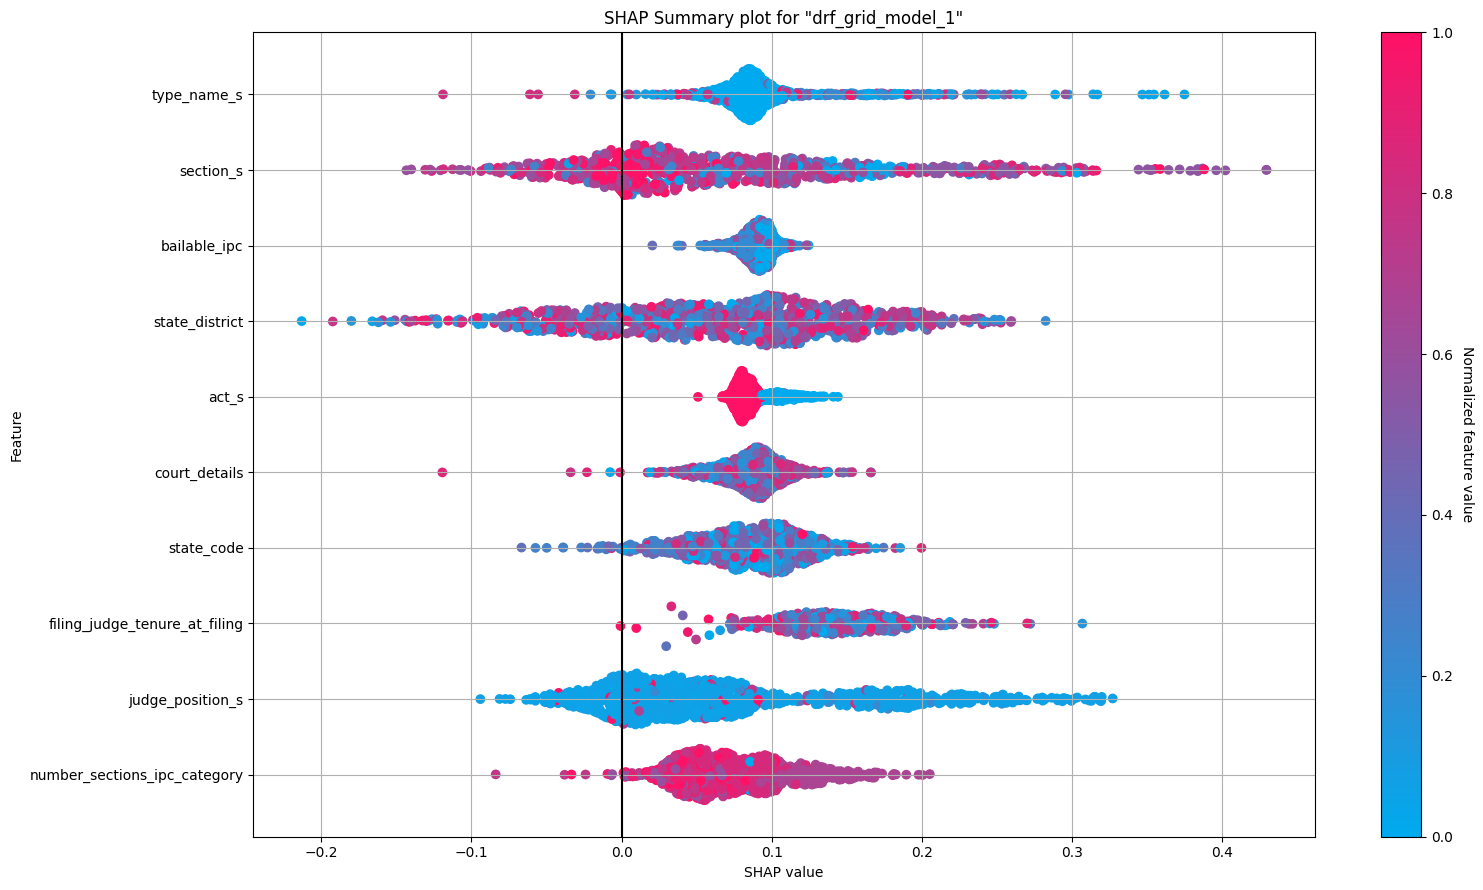

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

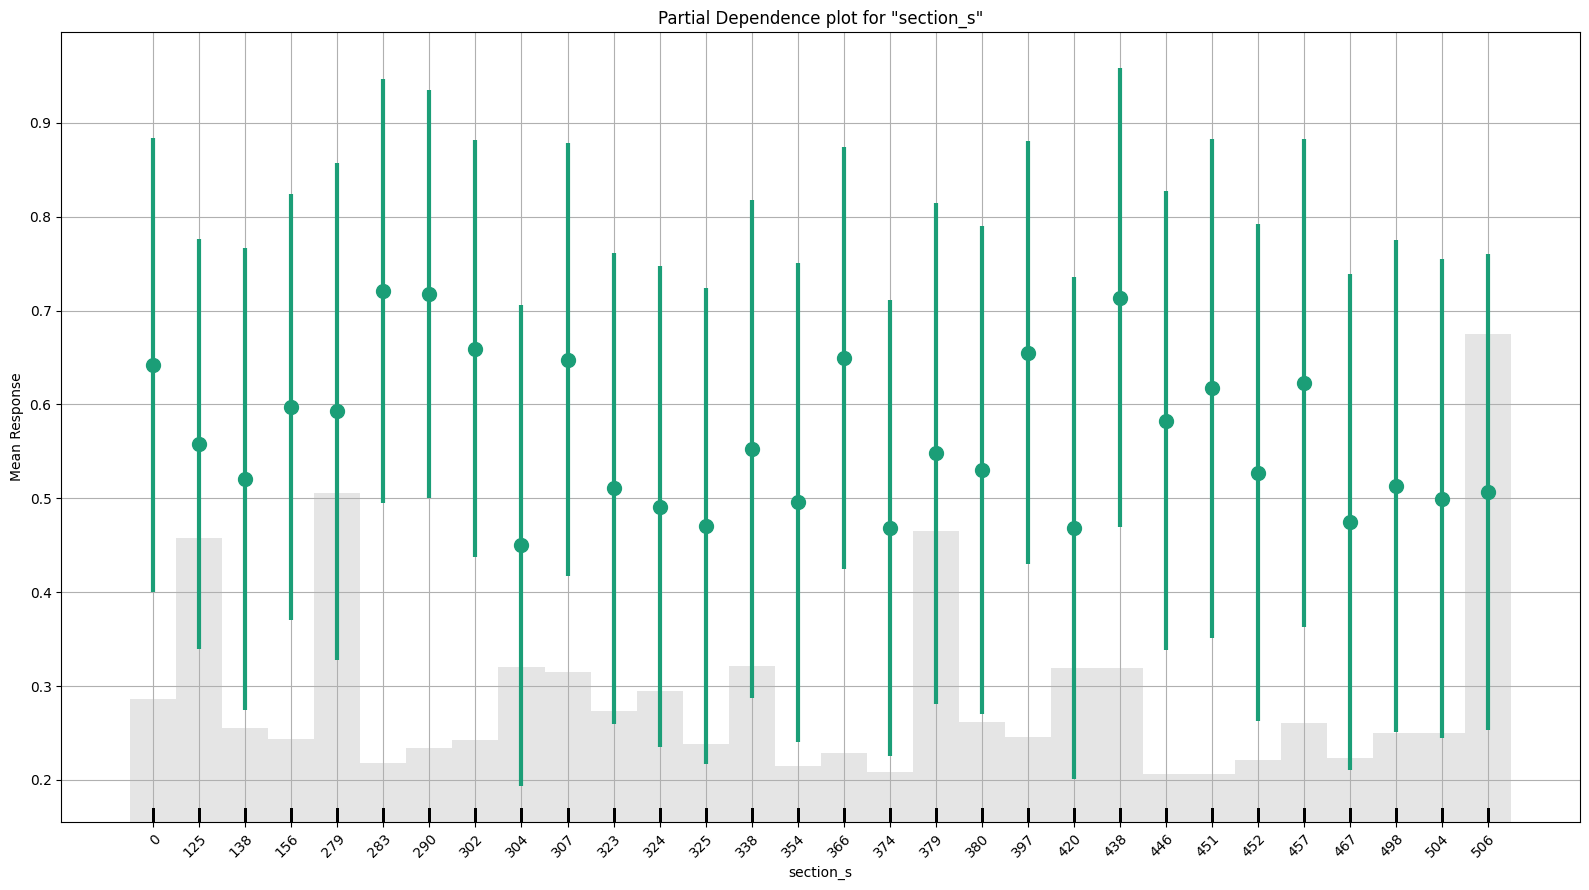

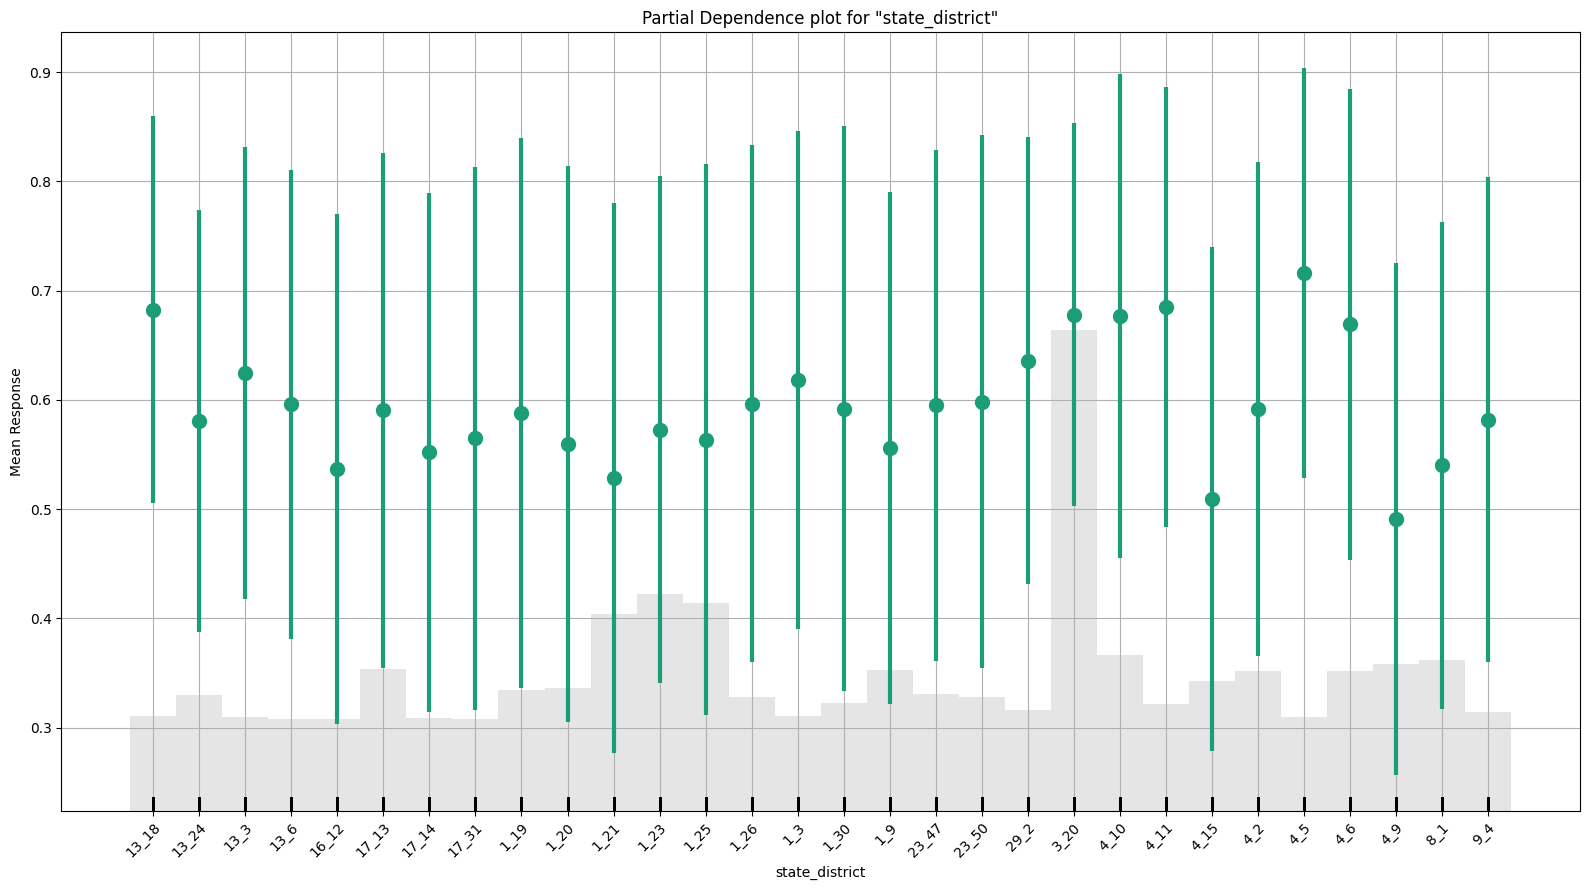

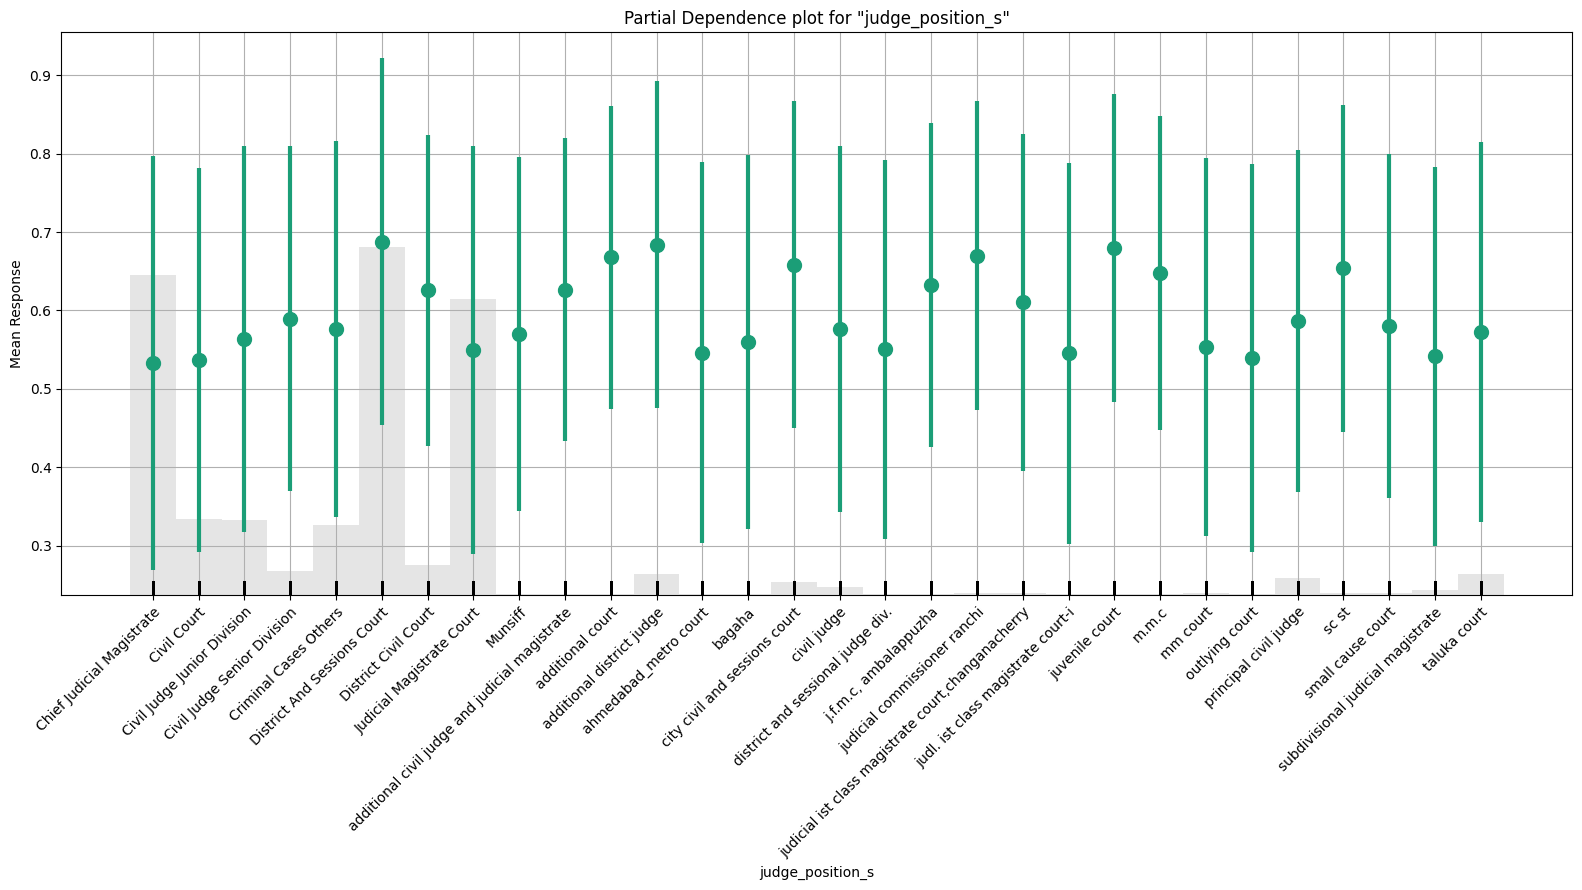

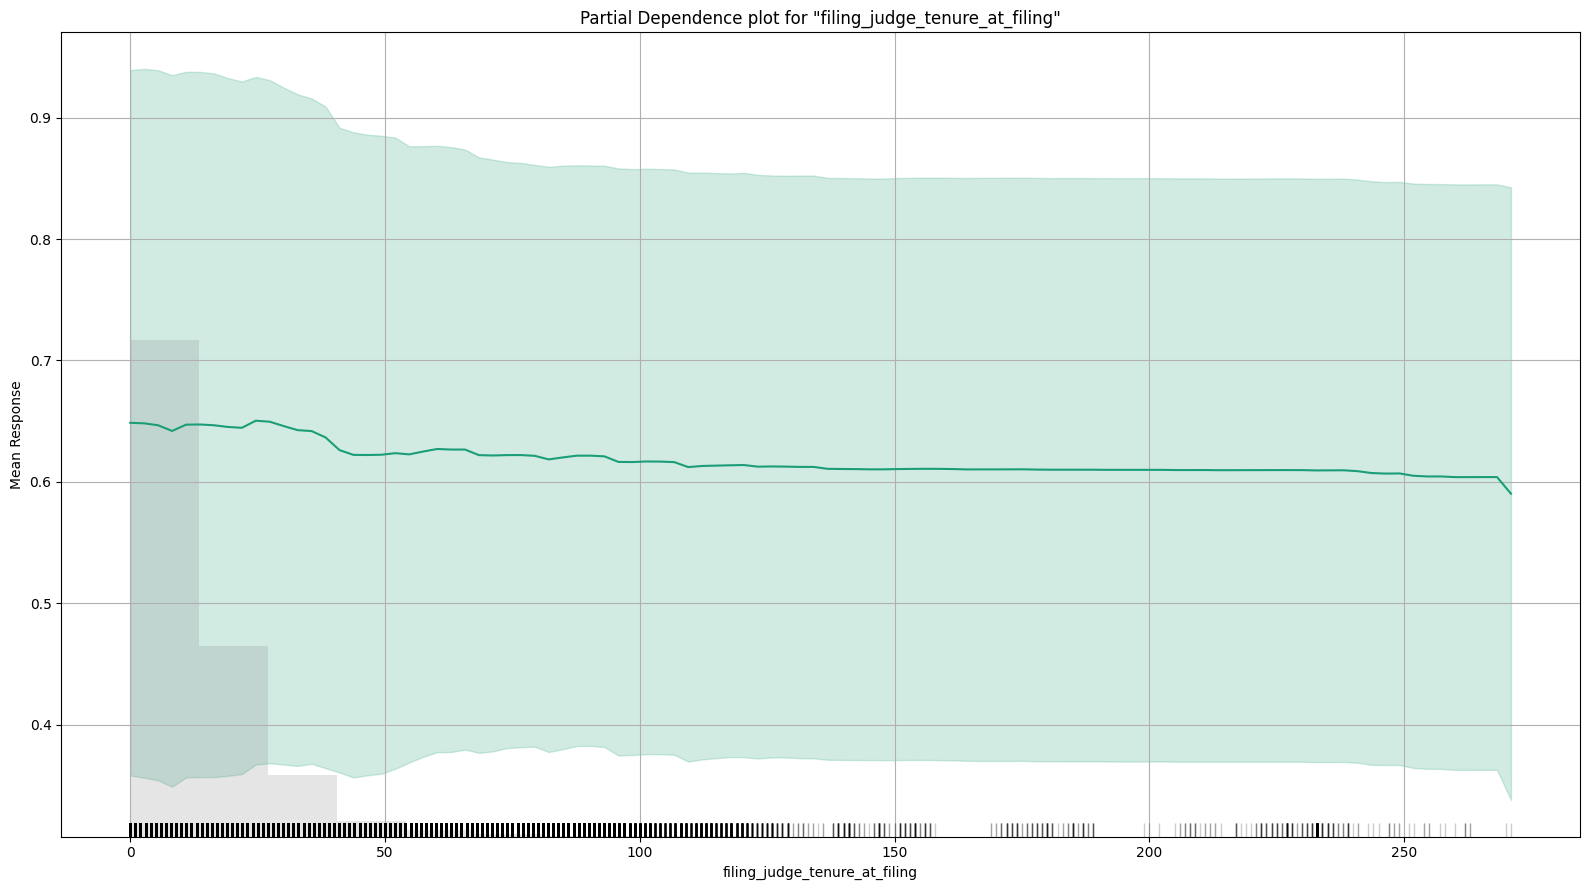

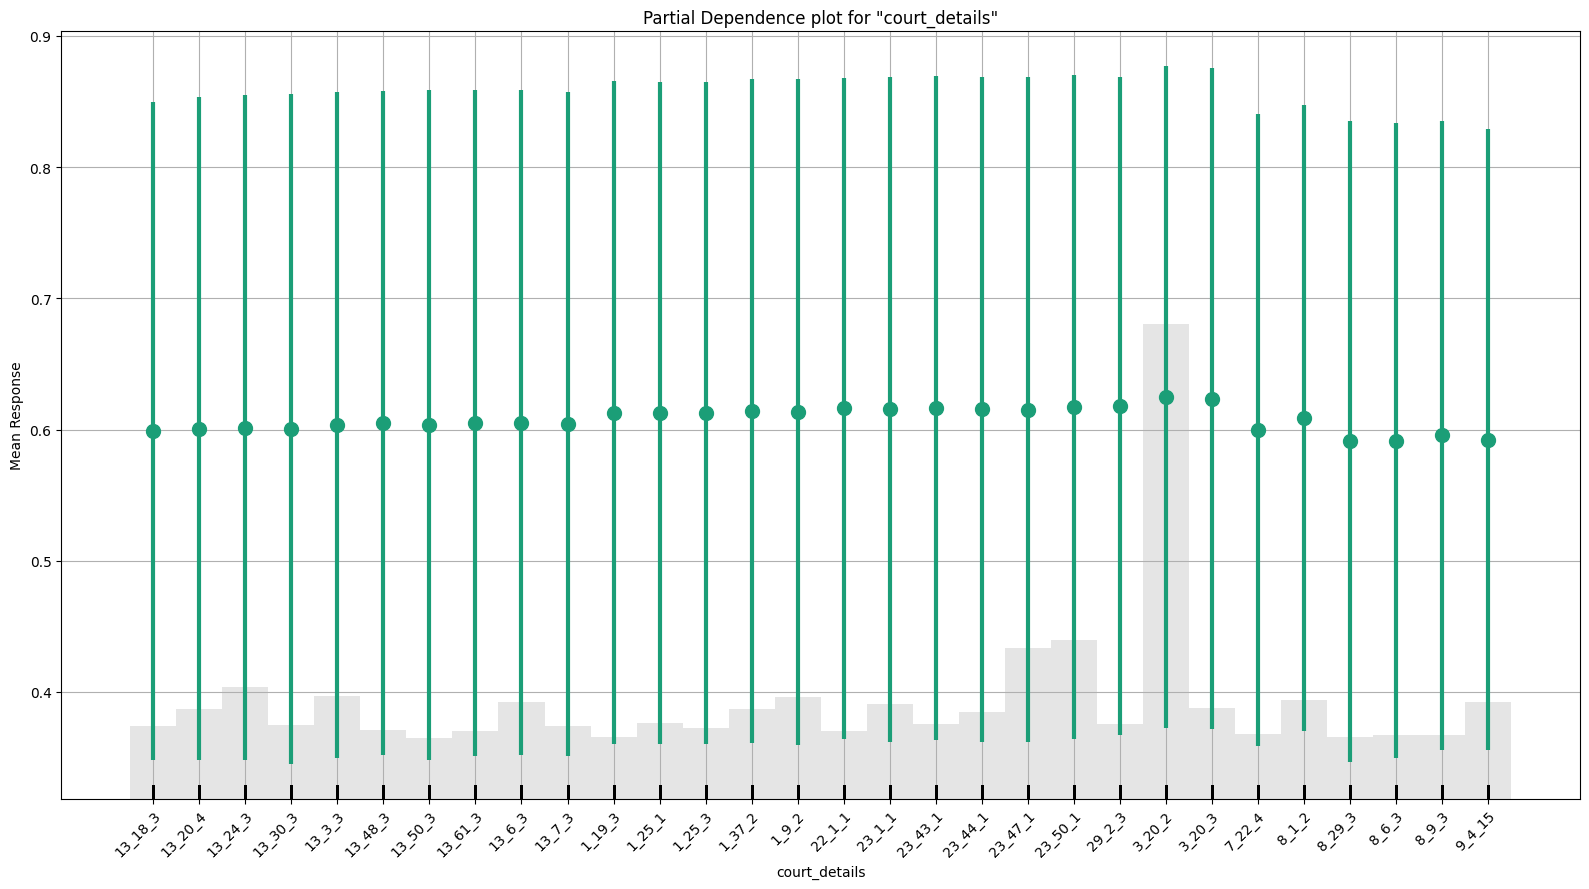

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## drf_grid_model_1

,delayed,ontime,Error,Rate
delayed,913556.0,427361.0,0.3187,(427361.0/1340917.0)
ontime,245254.0,1772444.0,0.1216,(245254.0/2017698.0)
Total,1158810.0,2199805.0,0.2003,(672615.0/3358615.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

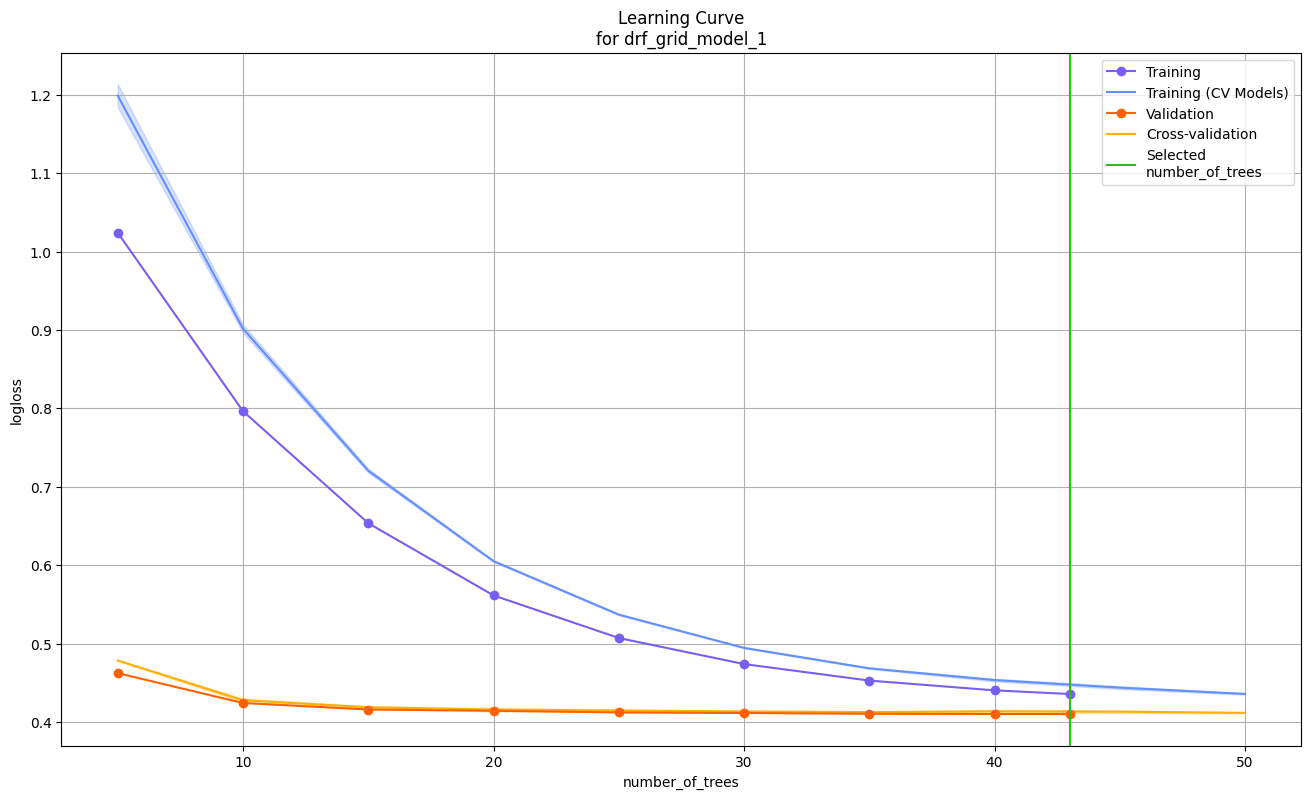

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

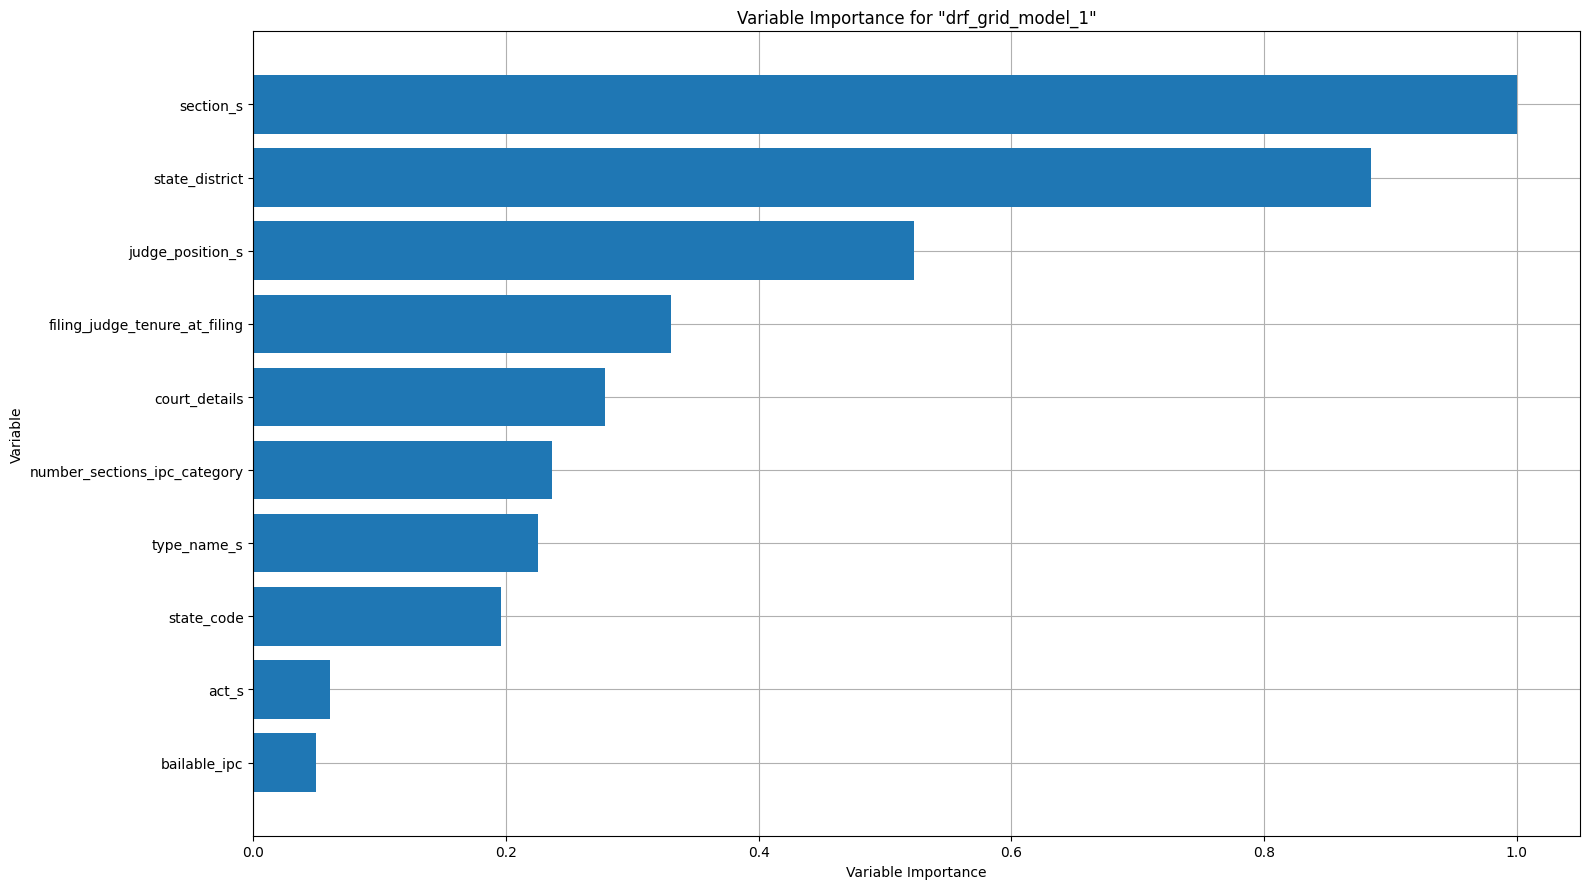

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

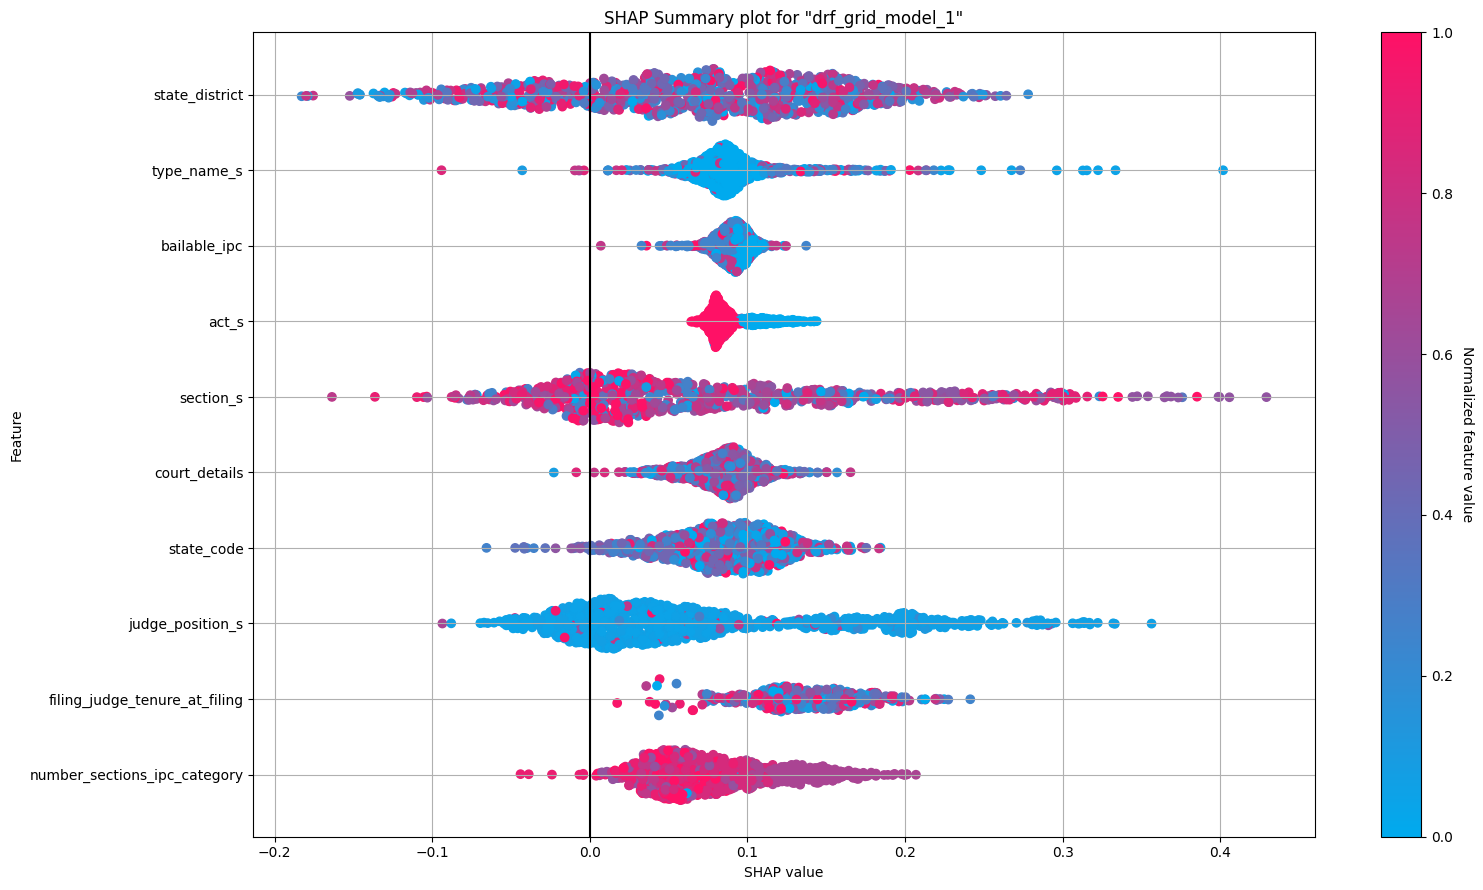

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

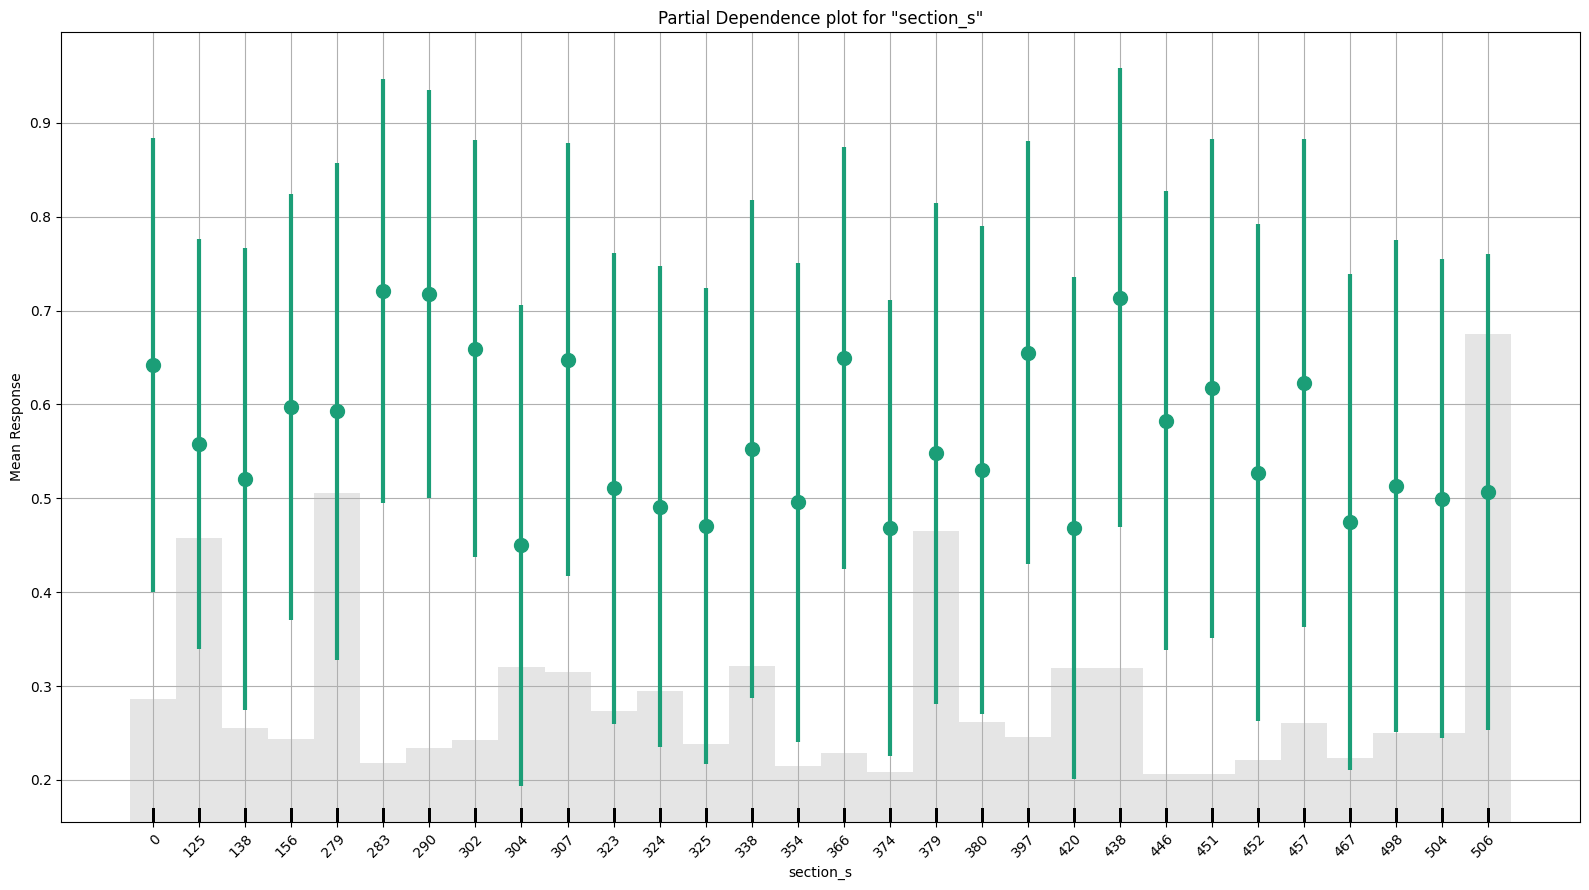

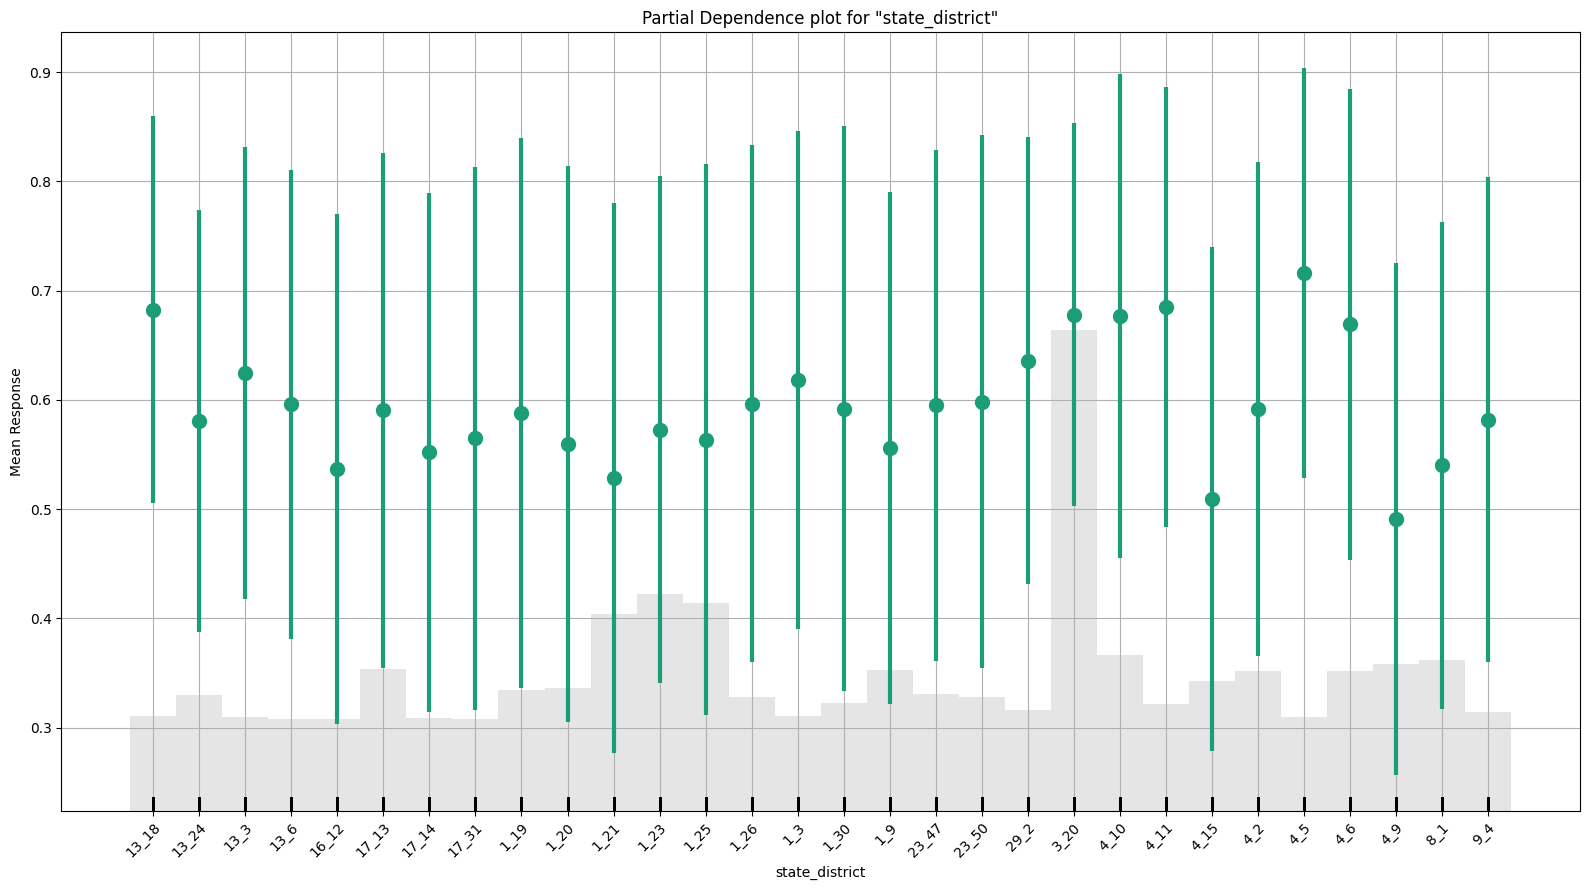

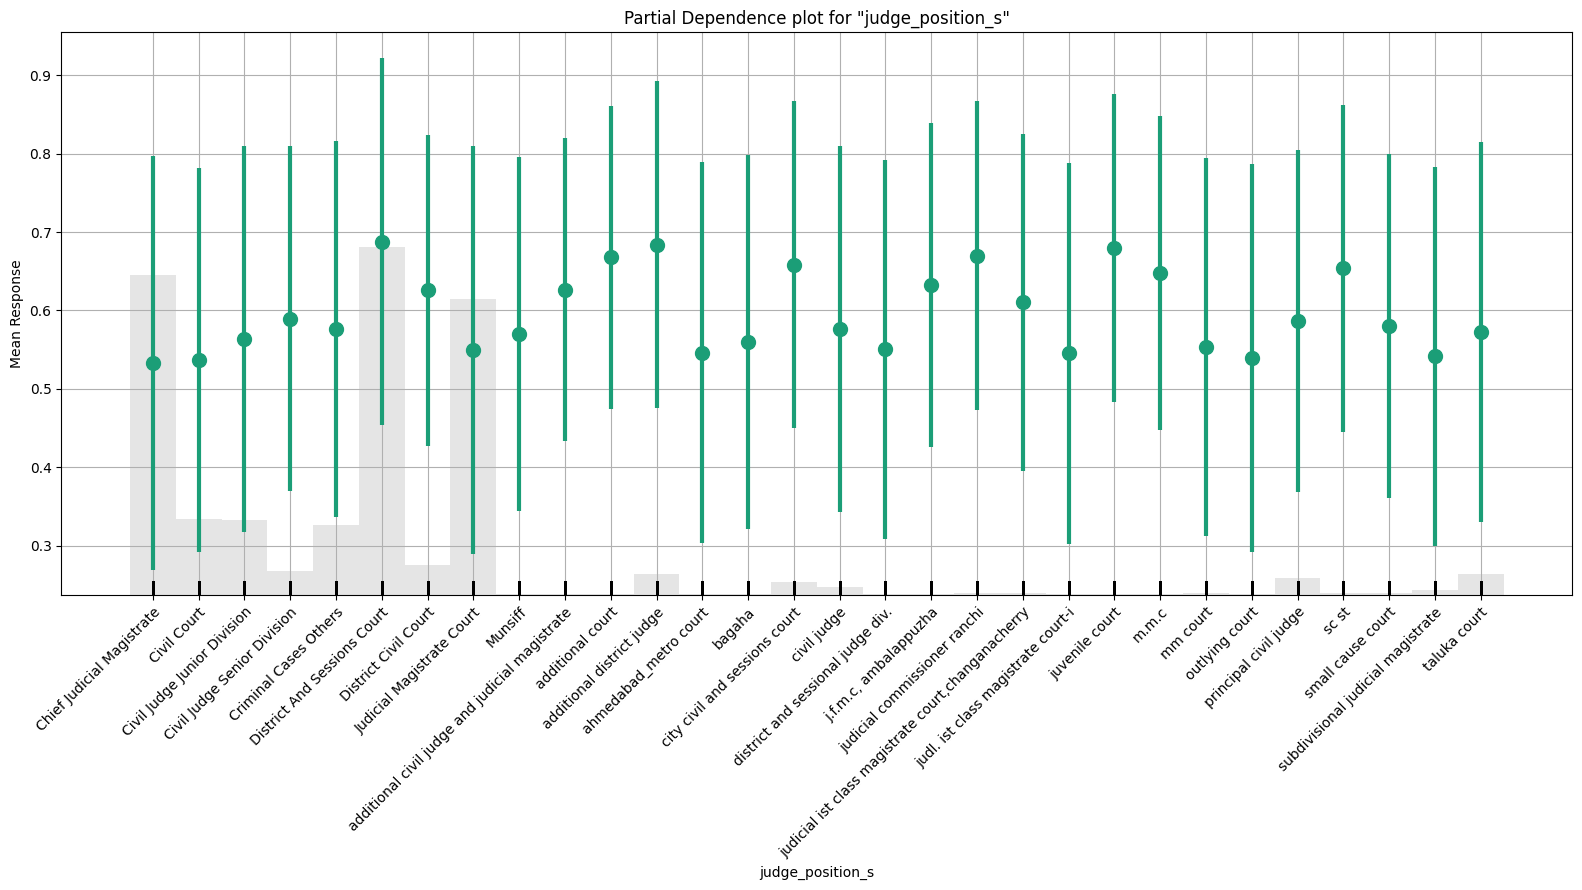

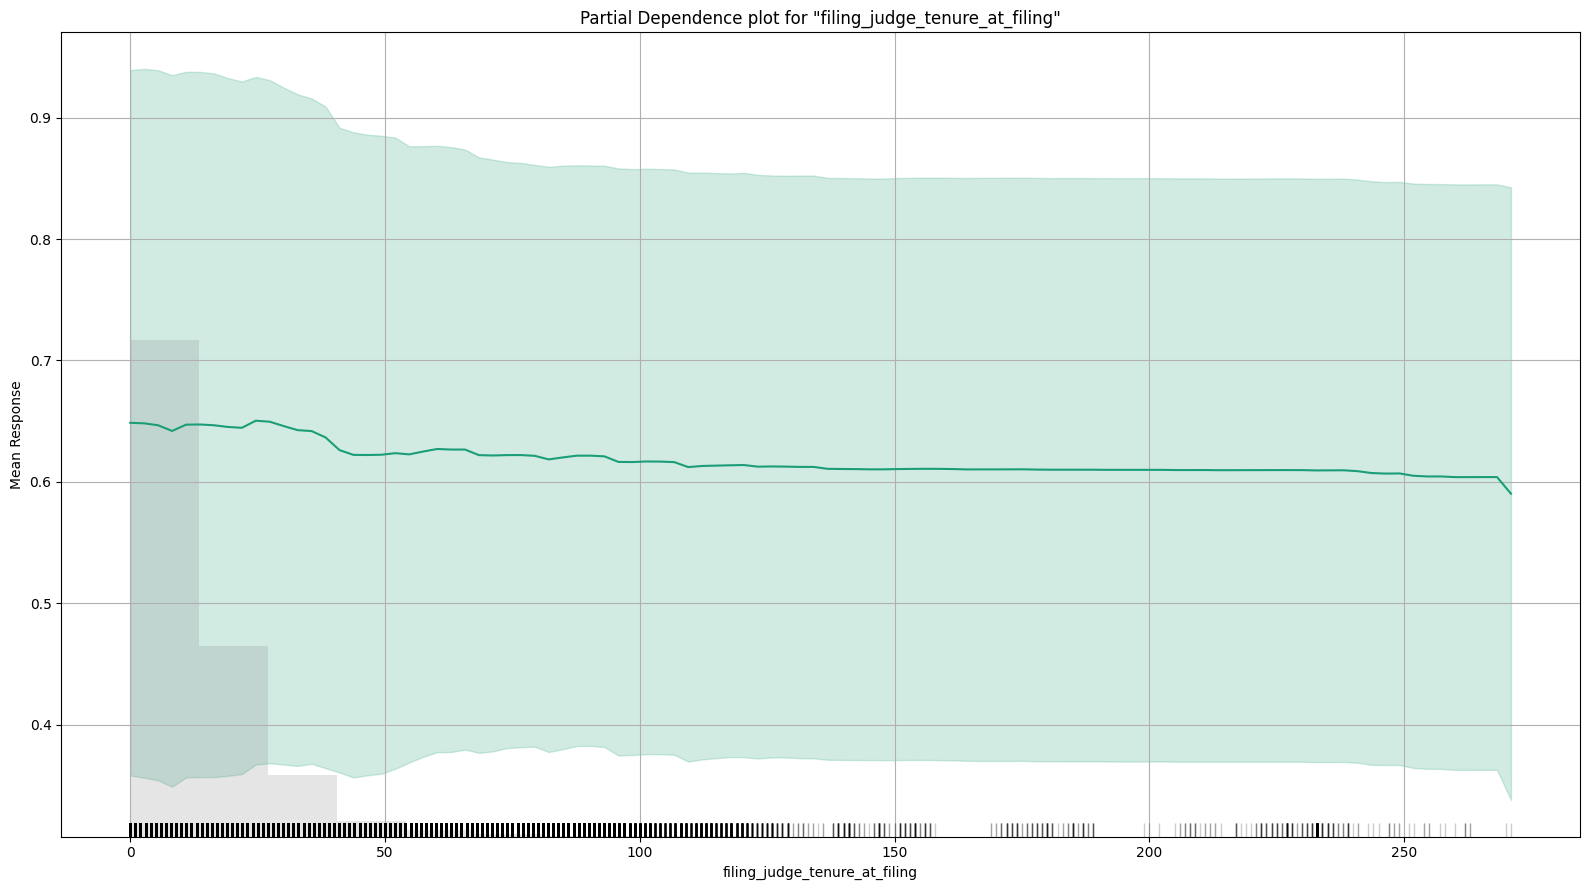

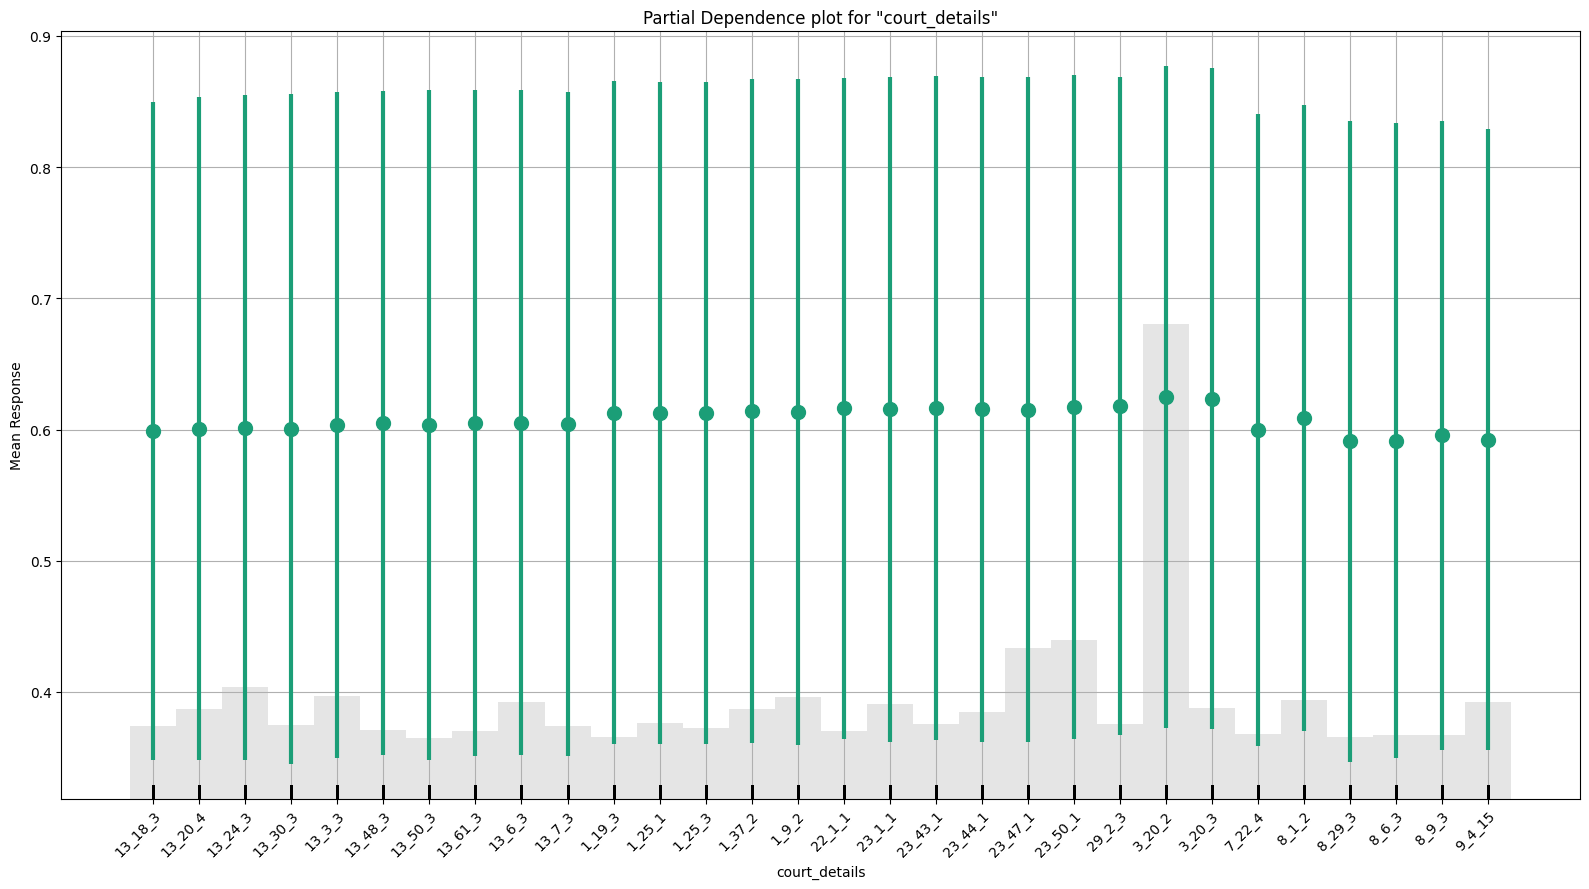

In [54]:
explanations = best_model.explain(cases2010to2018_test)

def save_plots(plot_data, parent_key=""):
    for key, value in plot_data.items():
        if isinstance(value, h2o.plot._plot_result._MObject):
            # This is a plot object, save it
            plot_figure = value.figure()
            plot_filename = f"{plots_dir}/{parent_key}_{key}.png"
            plot_figure.savefig(plot_filename)
        elif isinstance(value, dict):
            # Recursively explore nested dictionaries
            save_plots(value, parent_key=f"{parent_key}_{key}")

# Create a directory to save the plots
plots_dir = "/content/drive/MyDrive/Law/criminalall-used/explanation_plots"
os.makedirs(plots_dir, exist_ok=True)

# Call the function to save plots
save_plots(explanations)

explanations = best_model.explain(cases2010to2018_test)


In [53]:
plot_save_directory = "/content/drive/MyDrive/Law/criminalall-used/performance"
columns = ["filing_judge_tenure_at_filing", "state_district", "judge_position_s"]

for col in columns:
    # Increase the number of bins to a higher value, e.g., 512
    partial_plot = best_model.partial_plot(cases2010to2018_test, cols=[col], figsize=(5, 5), plot=False)

    # Extract the table data from the H2OTwoDimTable object
    data = partial_plot[0].cell_values
    text_file_path = os.path.join(plot_save_directory, f"{col}_partial_plot.txt")
    # Open a file for writing
    with open(text_file_path, "w") as text_file:

      text_file.write(partial_plot[0]._table_header + "\n")

      # Write the column headers
      text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

      # Write the data
      for row in data:
          text_file.write("\t".join(map(str, row)) + "\n")

PartialDependencePlot progress: |██████████████████████████ (cancelled)


KeyboardInterrupt: 

In [51]:
import random

explanations_dir = "/content/drive/MyDrive/Law/criminalall-used/explanation_ind_plots"
os.makedirs(explanations_dir, exist_ok=True)


num_rows_to_explain = 10
random_indices = random.sample(range(cases2010to2018_test.nrow), num_rows_to_explain)
table_data = []

def save_plots_row(plot_data,plots_dir, parent_key=""):
    for key, value in plot_data.items():
        if isinstance(value, h2o.plot._plot_result._MObject):
            # This is a plot object, save it
            plot_figure = value.figure()
            plot_filename = f"{plots_dir}/{parent_key}_{key}.png"
            plot_figure.savefig(plot_filename)
        elif isinstance(value, dict):
            # Recursively explore nested dictionaries
            save_plots_row(value, plots_dir, parent_key=f"{parent_key}_{key}")

# Explain each of the selected rows and save the explanations
for row_index in random_indices:
    print(row_index)
    # explanation = best_model.explain_row(cases2010to2018_test, row_index)
    # Retrieve the actual values and model predictions

    # Call the function to save plots
    #save_plots_row(explanation,explanations_dir, row_index)
    actual_value = cases2010to2018_test[row_index, 'pendency_model_multiyear']
    #model_prediction = best_model.predict(cases2010to2018_test[row_index, :]).as_data_frame().iloc[0, 0]

    # Append the details to the table_data list
    #table_data.append({'Serial Number': row_index, 'Original': actual_value, 'Model Prediction': model_prediction})

        # Prediction and probabilities
    model_prediction_df = best_model.predict(cases2010to2018_test[row_index, :]).as_data_frame()
    label = model_prediction_df['predict'].iloc[0]
    probability = model_prediction_df[label].iloc[0]  # Probability of the predicted label

    # Append the details to the table_data list
    table_data.append({
        'Serial Number': row_index,
        'Original': actual_value,
        'Model Prediction Label': label,
        'Model Prediction Probability': probability
    })

# Create a DataFrame from the list
results_table = pd.DataFrame(table_data)

# Print or save the table as needed
print(results_table)
# Optionally save the table to a CSV file
table_filename = f"{explanations_dir}/randompredictions.csv"
results_table.to_csv(table_filename, index=False)

284761
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2475792
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1591645


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1578623
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1948491


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2132556
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1730540


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3074251
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2206271


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
203593
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
   Serial Number Original Model Prediction Label  Model Prediction Probability
0         284761  delayed                delayed                      0.670285
1        2475792   ontime                delayed                      0.778377
2        1591645  delayed                delayed                      0.754166
3        1578623   ontime                 ontime                      0.758930
4        1948491  delayed                delayed                      0.863639
5        2132556  delayed                delayed                      0.849607
6        1730540   ontime                 ontime                      0.957378
7        3074251   ontime                 ontime                      0.906338
8        2206271   ontime                 ontime                      0.880050
9         203

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

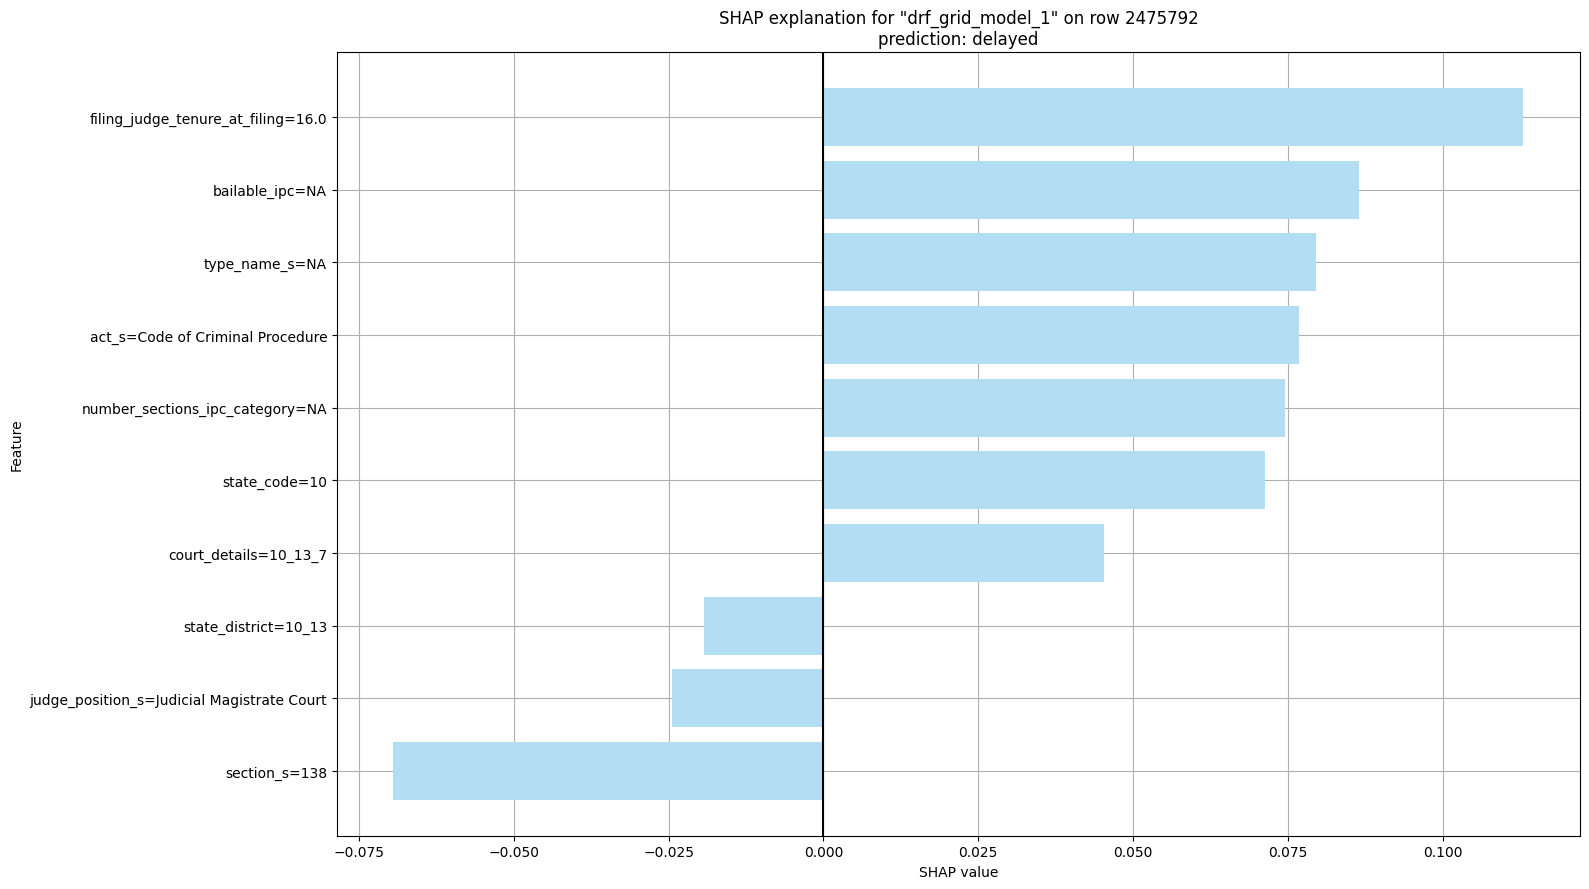

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

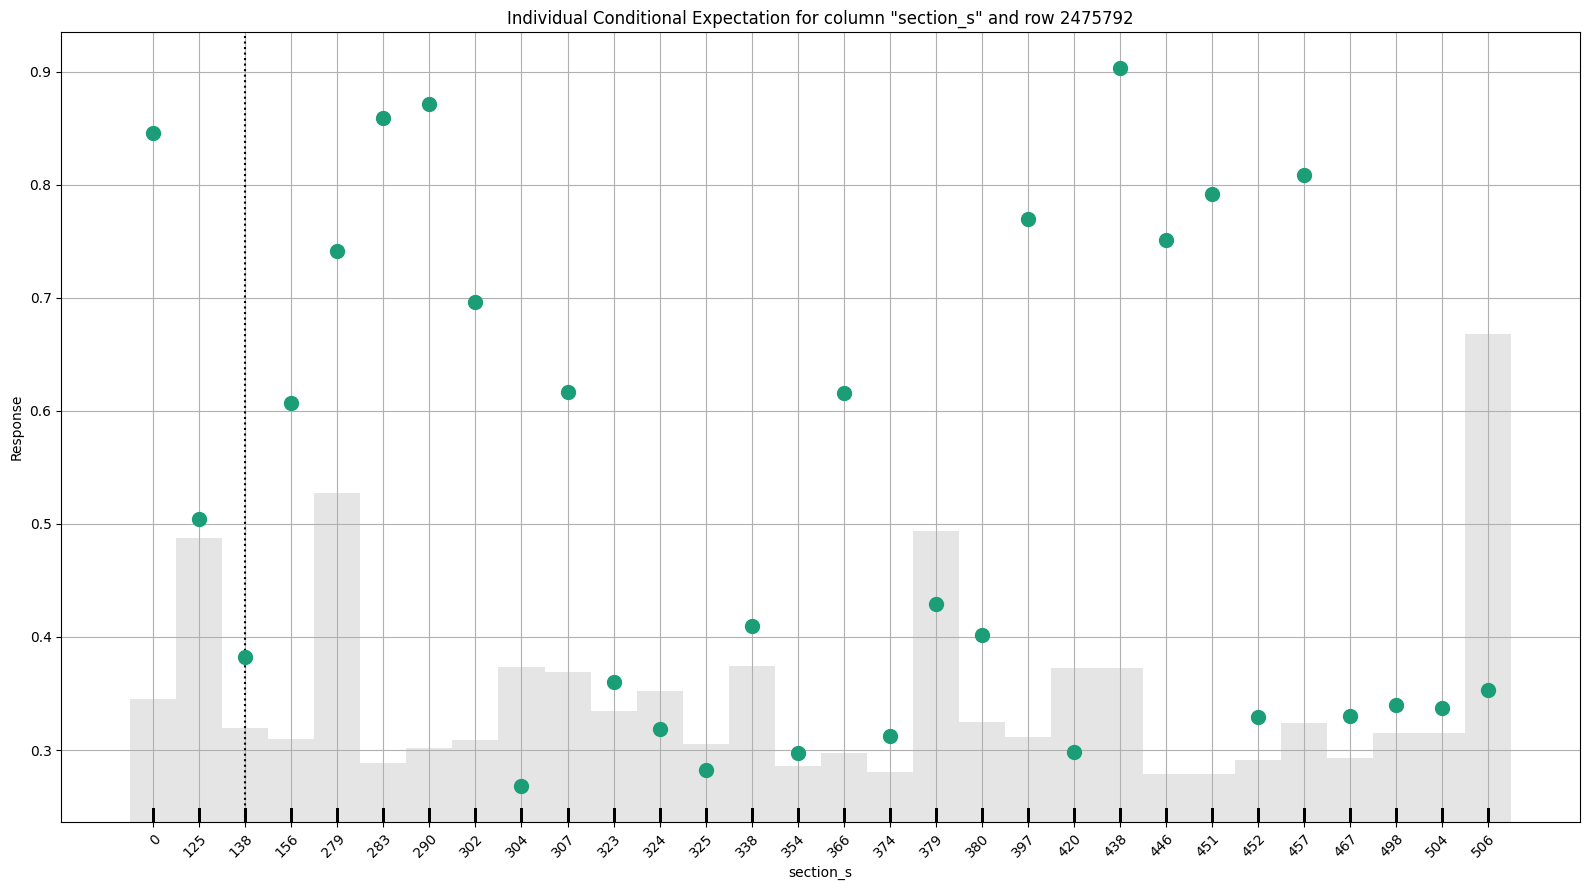

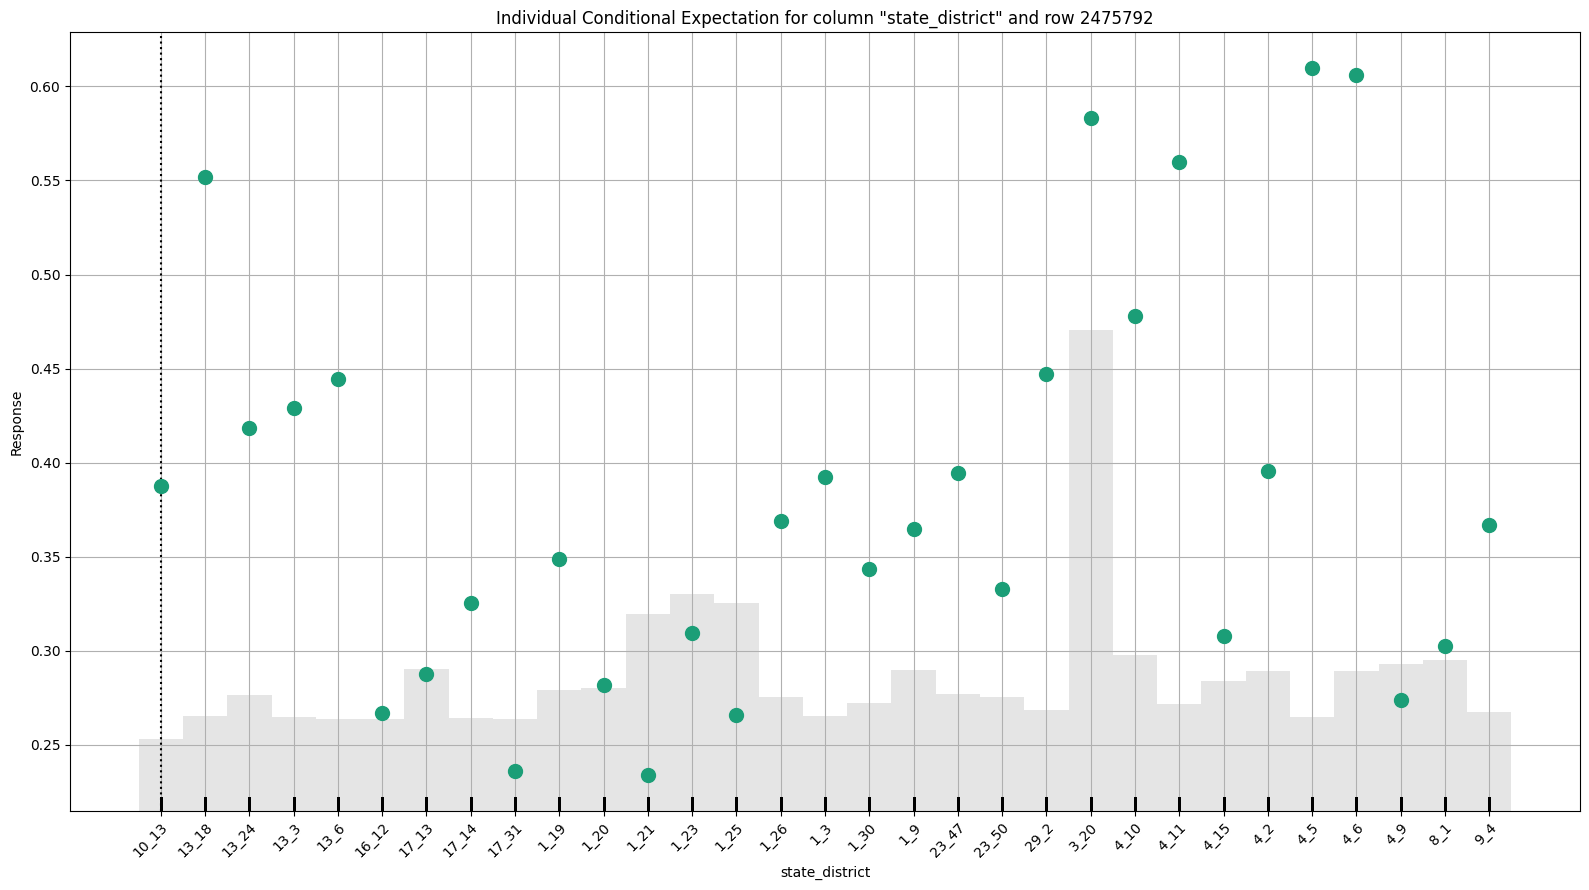

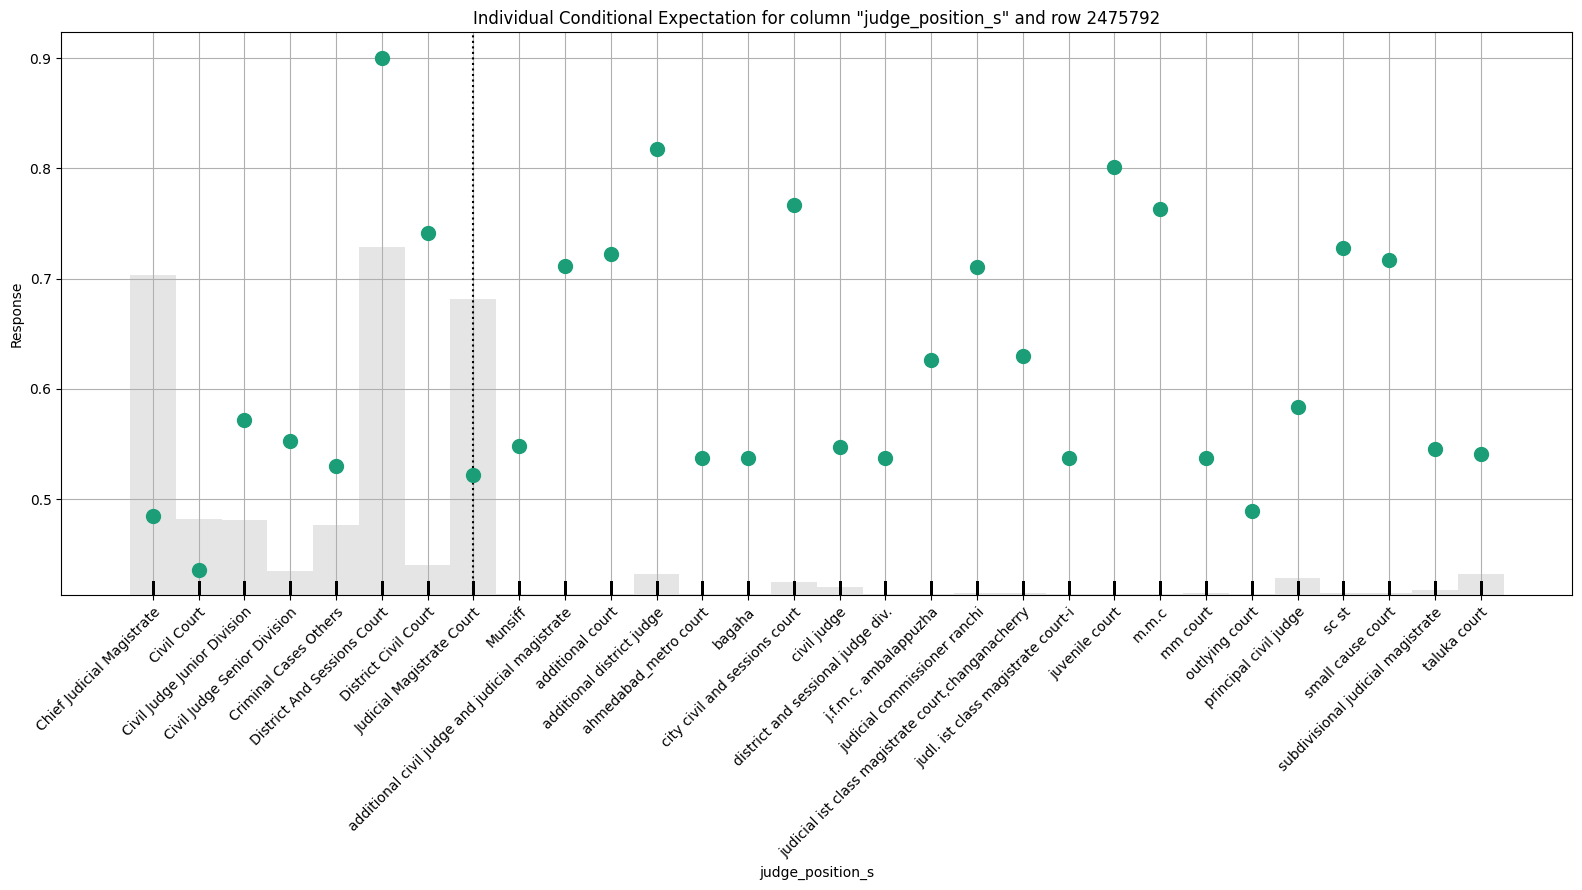

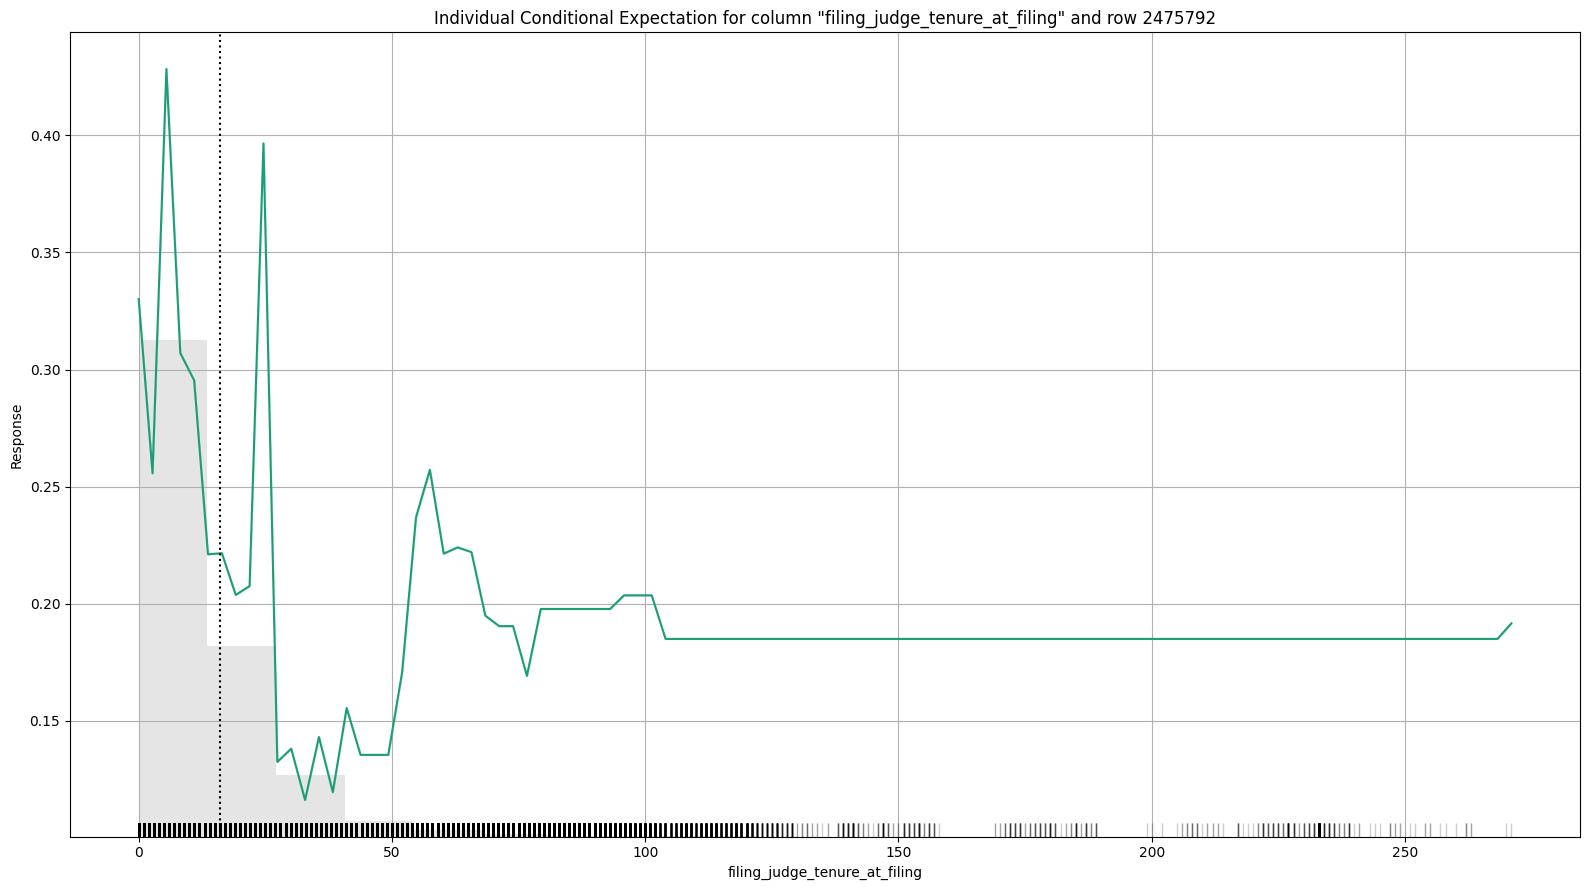

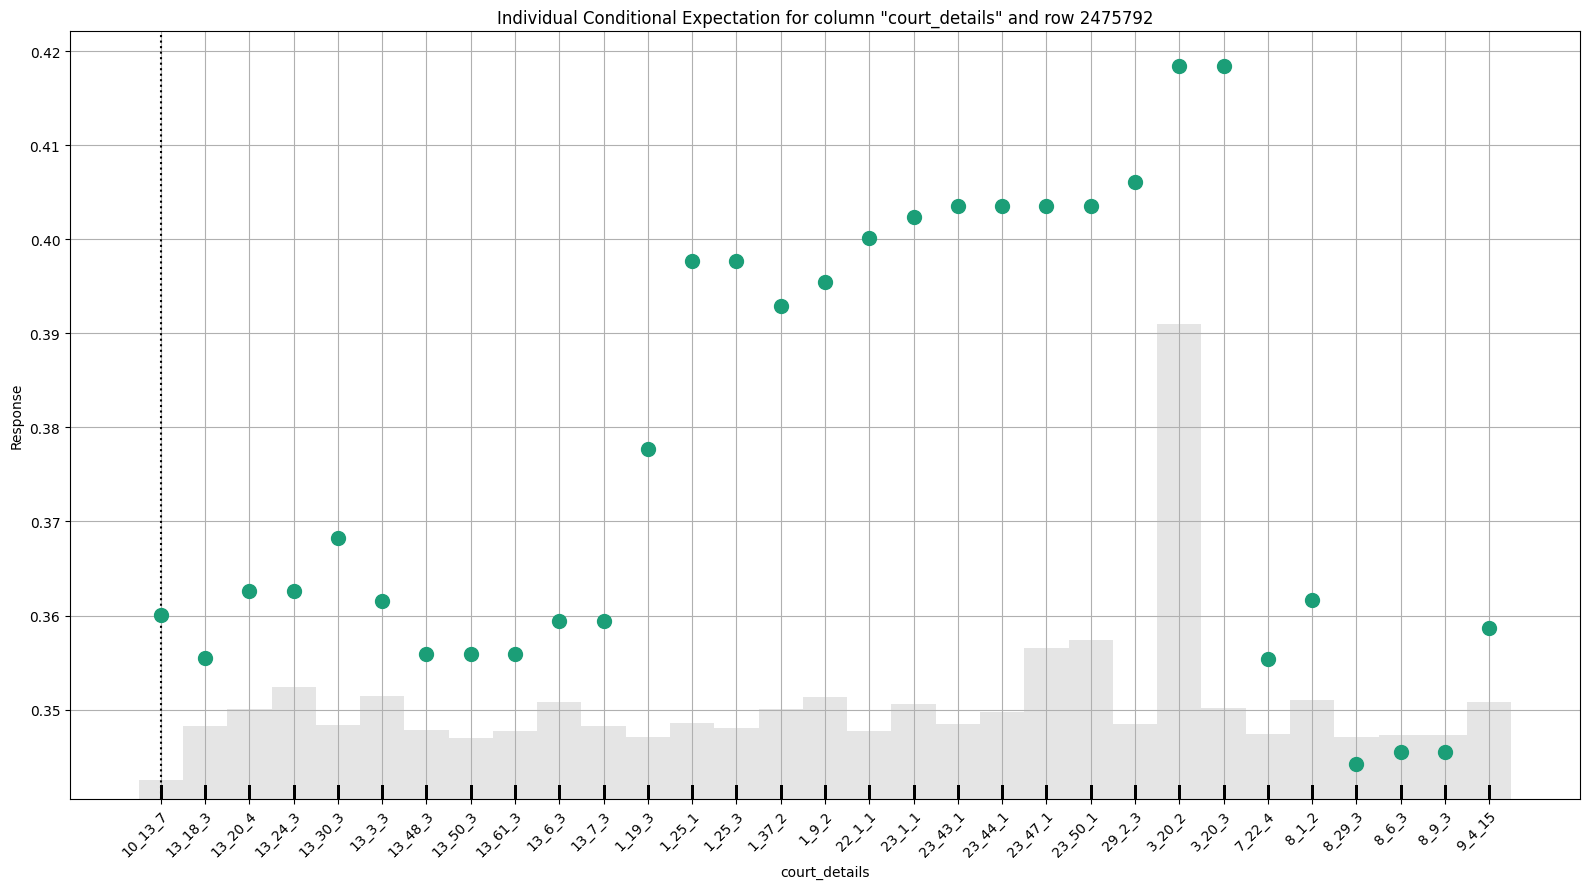

In [55]:
explanation = best_model.explain_row(cases2010to2018_test, 2475792)


In [46]:
import random

explanations_dir = "/content/drive/MyDrive/Law/criminalall-used/explanation_ind_plots"
os.makedirs(explanations_dir, exist_ok=True)


num_rows_to_explain = 100
random_indices = random.sample(range(cases2010to2018_test.nrow), num_rows_to_explain)
table_data = []

def save_plots_row(plot_data,plots_dir, parent_key=""):
    for key, value in plot_data.items():
        if isinstance(value, h2o.plot._plot_result._MObject):
            # This is a plot object, save it
            plot_figure = value.figure()
            plot_filename = f"{plots_dir}/{parent_key}_{key}.png"
            plot_figure.savefig(plot_filename)
        elif isinstance(value, dict):
            # Recursively explore nested dictionaries
            save_plots_row(value, plots_dir, parent_key=f"{parent_key}_{key}")

# Explain each of the selected rows and save the explanations
for row_index in random_indices:
    print(row_index)
    # explanation = best_model.explain_row(cases2010to2018_test, row_index)
    # Retrieve the actual values and model predictions

    # Call the function to save plots
    #save_plots_row(explanation,explanations_dir, row_index)
    actual_value = cases2010to2018_test[row_index, 'pendency_model_multiyear']
    #model_prediction = best_model.predict(cases2010to2018_test[row_index, :]).as_data_frame().iloc[0, 0]

    # Append the details to the table_data list
    #table_data.append({'Serial Number': row_index, 'Original': actual_value, 'Model Prediction': model_prediction})

        # Prediction and probabilities
    model_prediction_df = best_model.predict(cases2010to2018_test[row_index, :]).as_data_frame()
    label = model_prediction_df['predict'].iloc[0]
    probability = model_prediction_df[label].iloc[0]  # Probability of the predicted label

    # Append the details to the table_data list
    table_data.append({
        'Serial Number': row_index,
        'Original': actual_value,
        'Model Prediction Label': label,
        'Model Prediction Probability': probability
    })

# Create a DataFrame from the list
results_table = pd.DataFrame(table_data)

# Print or save the table as needed
print(results_table)
# Optionally save the table to a CSV file
table_filename = f"{explanations_dir}/randompredictions100.csv"
results_table.to_csv(table_filename, index=False)

485072
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2330387
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
880051


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
445697
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1709047


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
60396
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3284333


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
234359
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1259216


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2613909
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1877408


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
423330
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3329181


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1907307
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3347526


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1309326
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2397176


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3294203
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
828708


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2517637
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2462090


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
773339
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2089837


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3049524
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1459714


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2794265
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
241871


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1844715
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
103517


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1503142
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1701650


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3194296
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1318784


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
945100
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2760001


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
560873
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
497740


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3005806
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
172012


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
640031
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3175710


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1394459
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
819616


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2720185
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
544371


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2159136
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3173160


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3010329
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1048627


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3288840
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
964064


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3094963
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1508693


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
986867
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1370545


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
733872
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3299343


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
962089
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
668075


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1963054
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
741357


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1695752
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2409052


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2983065
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3351701


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
380822
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
430530


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2804793
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
853931


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1644451
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2210334


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2552432
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2396944


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1074201
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1603541


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2349043
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1801939


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2657238
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1507143


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
661808
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3041847


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1474111
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
359380


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1678299
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2709395


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1246143
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1955384


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
411991
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
568623


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
887373
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2799953


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2200668
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1979777


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
57436
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
384211


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
3232009
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
818524


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
629365
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
2615132


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
1127371
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
    Serial Number Original Model Prediction Label  \
0          485072   ontime                 ontime   
1         2330387  delayed                delayed   
2          880051  delayed                delayed   
3          445697   ontime                 ontime   
4         1709047  delayed                delayed   
..            ...      ...                    ...   
95        3232009   ontime                 ontime   
96         818524   ontime                 ontime   
97         629365  delayed                 ontime   
98        2615132   ontime                 ontime   
99        1127371   ontime                 ontime   

    Model Prediction Probability  
0                       0.881167  
1                       0.857451  
2                       0.799963  
3                       0

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
